<a href="https://colab.research.google.com/github/tolossamuel/Olist-E-commerce-Data-Analysis/blob/main/Ariba_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Olist is a Brazilian e-commerce platform that connects small and medium-sized businesses to customers across Brazil. The platform operates as a marketplace, where merchants can list their products and services and customers can browse and purchase them online.

The Olist sales dataset is a collection of anonymized data about orders placed on the Olist from September 2016 to September 2018. It contains a wide range of information about each order, including the order date, product details, payment and shipping information, customer and seller IDs, and customer reviews. The dataset also includes information about the sellers who list their products on Olist, as well as data on customer behavior and demographics. The dataset is designed to help analysts and researchers better understand the e-commerce landscape in Brazil and identify opportunities for growth and optimization.

1. Revenue and Profit Analysis:

  What are the monthly and yearly revenue and profit trends?

  Which product categories contribute the most to overall profit?

  What are the profit margins for different product categories and sub-categories?
  
  How do seasonal sales patterns affect revenue and profit?

  What are the top-performing products in terms of revenue and profit?

2. Customer Analysis:

  Who are the top customers by revenue and profit?

  What is the average order value and frequency for different customer segments?

  How does customer lifetime value vary across different segments?

  What factors drive higher customer lifetime value?

  How do discounts and promotions impact customer purchasing behavior?

3. Inventory Management:

  What are the inventory turnover rates for different product categories?

  How does inventory level correlate with salles performance?

  Identify slow-moving and fast-moving products.

  How effective are current inventory management practices?

  What recommendations can be made to optimize inventory levels?

4. Sales Channel Performance:

  How do different sales channels (e.g., online, in-store) compare in terms of revenue and profit?

  Which channels have the highest customer acquisition and retention rates?

  How does marketing spend impact salles across different channels?

  What is the ROI of marketing campaigns for each channel?

  How do customer preferences differ across sales channels?


Data Dictionary

1/olist_customers_dataset.csv

    customer_id: unique identifier for each customer

    customer_unique_id: unique identifier for each customer (anonymized)

    customer_zip_code_prefix: zip code prefix of the customer's address

    customer_city: city where the customer is located

    customer_state: state where the customer is located

2/ olist_geolocation_dataset.csv

    geolocation_zip_code_prefix: zip code prefix for the location

    geolocation_lat: latitude of the location

    geolocation_lng: longitude of the location

    geolocation_city: city of the location

    geolocation_state: state of the location

3/ olist_orders_dataset.csv

    order_id: unique identifier for each order

    customer_id: unique identifier for the customer who placed the order

    order_status: current status of the order (e.g. delivered, shipped, canceled)

    order_purchase_timestamp: date and time when the order was placed

    order_approved_at: date and time when the payment for the order was approved

    order_delivered_carrier_date: date and time when the order was handed over to the carrier

    order_delivered_customer_date: date and time when the order was delivered to the customer

    order_estimated_delivery_date: estimated date when the order is expected to be delivered

4/ olist_order_items_dataset.csv

    order_id: unique identifier for the order

    order_item_id: unique identifier for each item within an order

    product_id: unique identifier for the product being ordered

    seller_id: unique identifier for the seller who listed the

    product shipping_limit_date: date and time when the seller has to ship the product

    price: price of the product

    freight_value: shipping fee for the product

5/ olist_order_payments_dataset.csv

    order_id: unique identifier for the order

    payment_sequential: index number for each payment made for an order

    payment_type: type of payment used for the order (e.g. credit card, debit card, voucher)

    payment_installments: number of installments in which the payment was made

    payment_value: value of the payment made

6/ olist_products_dataset.csv

    product_id: unique identifier for each product

    product_category_name: name of the category that the product belongs to

    product_name_lenght: number of characters in the product name

    product_description_lenght: number of characters in the product description

    product_photos_qty: number of photos for the product

    product_weight_g: weight of the product in grams

    product_length_cm: length of the product in centimeters

    product_height_cm: height of the product in centimeters

    product_width_cm: width of the product in centimeters

7/ olist_sellers_dataset.csv

    seller_id: unique identifier for each seller

    seller_zip_code_prefix: zip code prefix for the seller's location

    seller_city: city where the seller is located

    seller_state: state where the seller is located

8/ product_category_name_translation.csv

    product_category_name: name of the product category in Portuguese

    product_category_name_english: name of the product category in English

9/ olist_order_reviews_dataset.csv

    review_id: unique identifier for each review

    order_id: unique identifier for the order that the review is associated with

    review_score: numerical score (1-5) given by the customer for the product

    review_comment_title: title of the review comment

    review_comment_message: text of the review comment

    review_creation_date: date and time when the review was created

    review_answer_timestamp: date and time when the seller responded to the review (if applicable)

Note: The review comment fields (i.e. review_comment_title and review_comment_message) are optional, and may not be present in all reviews.

In [1]:
# read all csv file from the data csv file by pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#

# Read data and check data

In [2]:
customers_dataset = pd.read_csv("olist_customers_dataset.csv")
geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv')
order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')
order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv')
order_dateset = pd.read_csv('olist_orders_dataset.csv')
products_dataset = pd.read_csv('olist_products_dataset.csv')
sellers_dataset = pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')
order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv')

In [3]:
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geolocation_dataset.head()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_dateset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


total revenue and profit data

In [15]:
revenue_data_set = pd.merge(order_items_dataset, order_payments_dataset, on='order_id')

In [16]:

revenue_data_set.dropna(subset=['seller_id'], inplace=True)

In [17]:
revenue_data_set.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
payment_sequential,0
payment_type,0
payment_installments,0



# **1  Revenue and Profile Analysis**

Revenue and Profit Analysis:

  What are the monthly and yearly revenue and profit trends?

  Which product categories contribute the most to overall profit?

  What are the profit margins for different product categories and sub-categories?

  How do seasonal sales patterns affect revenue and profit?

  What are the top-performing products in terms of revenue and profit?


what are the monthly and yearly revenue and profile


In [ ]:
# prompt: rename payment_value to total_revenue from revenue_data_set

revenue_data_set.rename(columns={'payment_value': 'total_revenue'}, inplace=True)

In [22]:
revenue_data_set['profit'] = revenue_data_set['total_revenue'] - revenue_data_set['price']

In [23]:
revenue_data_set.columns


Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'total_revenue', 'profit'],
      dtype='object')

In [26]:
data_revenue_profit_date = revenue_data_set.merge(order_dateset[['order_id','customer_id','order_status','order_purchase_timestamp','order_estimated_delivery_date']], on='order_id')

In [28]:
data_revenue_profit_date.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'total_revenue', 'profit',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_estimated_delivery_date'],
      dtype='object')

In [29]:
# Convert order_purchase_timestamp to datetime format if it's not already
data_revenue_profit_date['order_purchase_timestamp'] = pd.to_datetime(data_revenue_profit_date['order_purchase_timestamp'])

In [30]:
# Extract month-year and year from the timestamp
data_revenue_profit_date['month_year'] = data_revenue_profit_date['order_purchase_timestamp'].dt.to_period('M')
data_revenue_profit_date['year'] = data_revenue_profit_date['order_purchase_timestamp'].dt.year


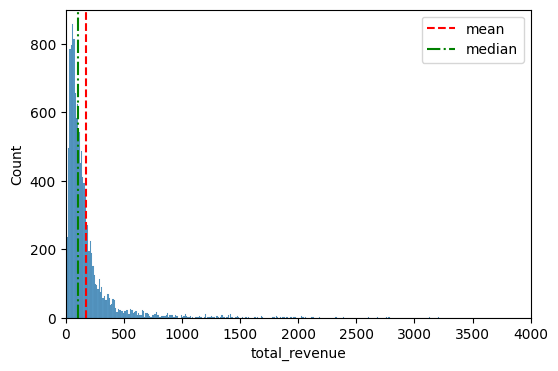

In [49]:
#Displaying the distribution of total_revenue column
plt.figure(figsize=(6, 4))
sns.histplot(data=data_revenue_profit_date, x='total_revenue')
plt.axvline(x=data_revenue_profit_date.total_revenue.mean(), color='r', linestyle='--', label='mean')
plt.axvline(x=data_revenue_profit_date.total_revenue.median(), color='g', linestyle='-.', label='median')
plt.xlim(0,4000)
plt.legend()
plt.show()

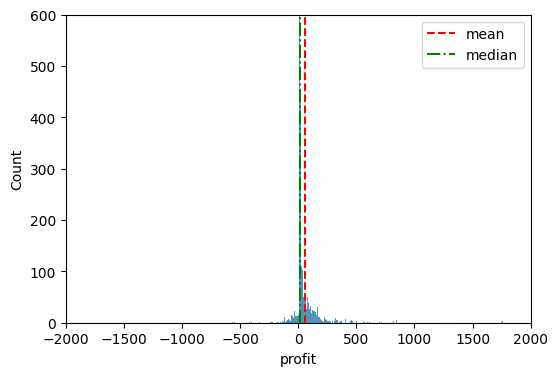

In [51]:
#Displaying the distribution of total_profit column
plt.figure(figsize=(6, 4))
sns.histplot(data=data_revenue_profit_date, x='profit')
plt.axvline(x=data_revenue_profit_date.profit.mean(), color='r', linestyle='--', label='mean')
plt.axvline(x=data_revenue_profit_date.profit.median(), color='g', linestyle='-.', label='median')
plt.xlim(-2000, 2000)
plt.ylim(0, 600)
plt.legend()
plt.show()

In [31]:
# Group by month-year and calculate the sum of revenue and profit
monthly_summary = data_revenue_profit_date.groupby('month_year').agg({
    'total_revenue': 'sum',
    'profit': 'sum'
}).reset_index()

monthly_summary.columns = ['Month-Year', 'Total Revenue', 'Total Profit']

monthly_summary

,Month-Year,Total Revenue,Total Profit
0,2016-10,6164.32,1742.12
1,2017-01,15869.07,4063.87
2,2017-02,34290.24,7344.37
3,2017-03,58907.49,19775.48
4,2017-04,56107.36,13341.18
5,2017-05,82491.53,23912.14
6,2017-06,70456.72,24813.76
7,2017-07,80025.92,22548.79
8,2017-08,81775.32,16884.35
9,2017-09,190788.30,115089.35


In [32]:
# Group by year and calculate the sum of revenue and profit
yearly_summary = data_revenue_profit_date.groupby('year').agg({
    'total_revenue': 'sum',
    'profit': 'sum'
}).reset_index()

yearly_summary.columns = ['Year', 'Total Revenue', 'Total Profit']

yearly_summary

,Year,Total Revenue,Total Profit
0,2016,6164.32,1742.12
1,2017,1012577.49,336854.90
2,2018,1110193.86,329597.61


In [34]:
monthly_summary['Month-Year'] = monthly_summary['Month-Year'].astype(str)


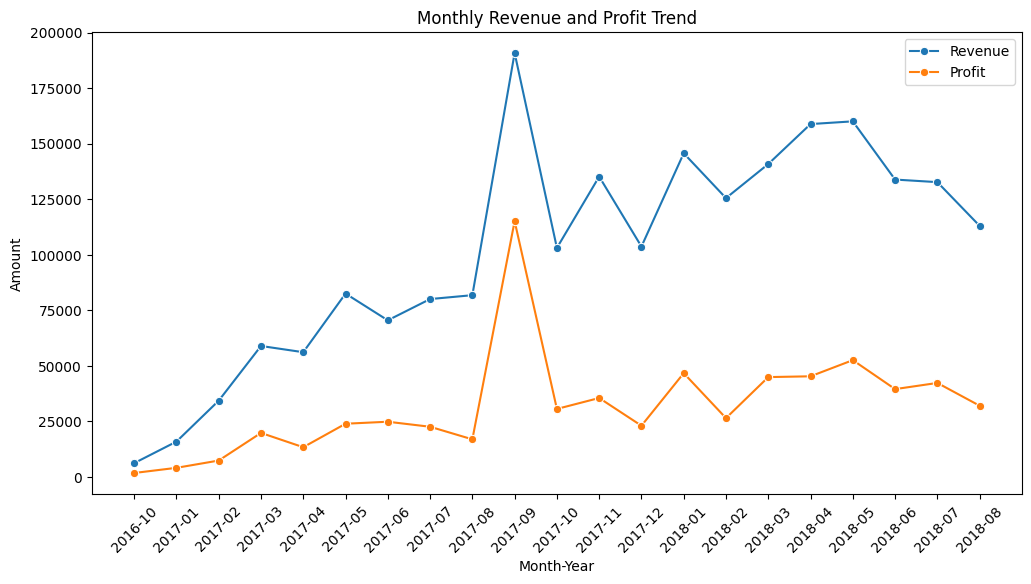

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_summary, x='Month-Year', y='Total Revenue', marker='o', label='Revenue')
sns.lineplot(data=monthly_summary, x='Month-Year', y='Total Profit', marker='o', label='Profit')
plt.title('Monthly Revenue and Profit Trend')
plt.xlabel('Month-Year')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.show()

<ipython-input-40-de46079902d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_summary, x='Year', y='Total Revenue', palette='viridis', label='Revenue')
<ipython-input-40-de46079902d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_summary, x='Year', y='Total Profit',palette='magma', alpha=0.7, label='Profit')


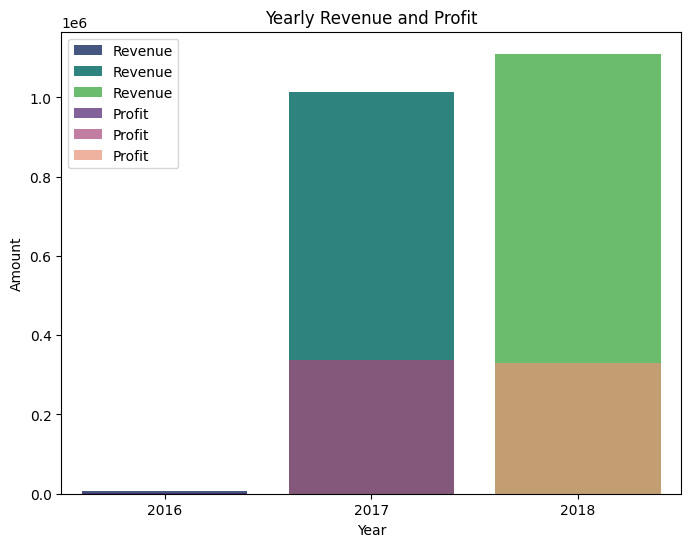

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(data=yearly_summary, x='Year', y='Total Revenue', palette='viridis', label='Revenue')
sns.barplot(data=yearly_summary, x='Year', y='Total Profit',palette='magma', alpha=0.7, label='Profit')
plt.title('Yearly Revenue and Profit')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.show()

**#  Which product categories contribute the most to overall profit? **

In [42]:
products_dataset.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [43]:
# Merge datasets to get all relevant information together
# Merging the datasets on 'product_id'
merged_data = pd.merge(revenue_data_set, products_dataset[['product_id', 'product_category_name']], on='product_id', how='left')



In [64]:
order_reviews_dataset.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [71]:
product_category_name_translation.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [72]:
merged_data = merged_data.merge(product_category_name_translation, on='product_category_name', how='left')

In [73]:
merged_data.rename(columns={'product_category_name_english': 'product_name'}, inplace=True)

In [74]:
merged_data['product_name'] = merged_data['product_name'].fillna('unknown')
merged_data['payment_type'] = merged_data['payment_type'].fillna(merged_data['payment_type'].mode()[0])

In [76]:
merged_data['product_category_name'] = merged_data['product_category_name'].fillna('unknown')

In [75]:
merged_data.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
payment_sequential,0
payment_type,0
payment_installments,0


In [85]:
# Grouping by 'product_category_name' and summing the 'profit'
profit_by_category = merged_data.groupby('product_name')['profit'].sum().reset_index()

# Sorting the categories by profit in descending order
profit_by_category = profit_by_category.sort_values(by='profit', ascending=False).reset_index(drop=True)


In [86]:
# Displaying the top 10 product categories by profit
top_categories = profit_by_category.head(10)
top_categories


,product_name,profit
0,computers_accessories,129835.28
1,furniture_decor,118094.46
2,fixed_telephony,98393.99
3,bed_bath_table,77306.46
4,office_furniture,60366.37
5,sports_leisure,56839.79
6,health_beauty,49157.02
7,housewares,48865.16
8,garden_tools,37633.01
9,telephony,20844.47


**Plot the top product categories contributing to overall profit**

<ipython-input-88-10d80ff84544>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='profit', y='product_name', data=top_categories, palette='viridis')


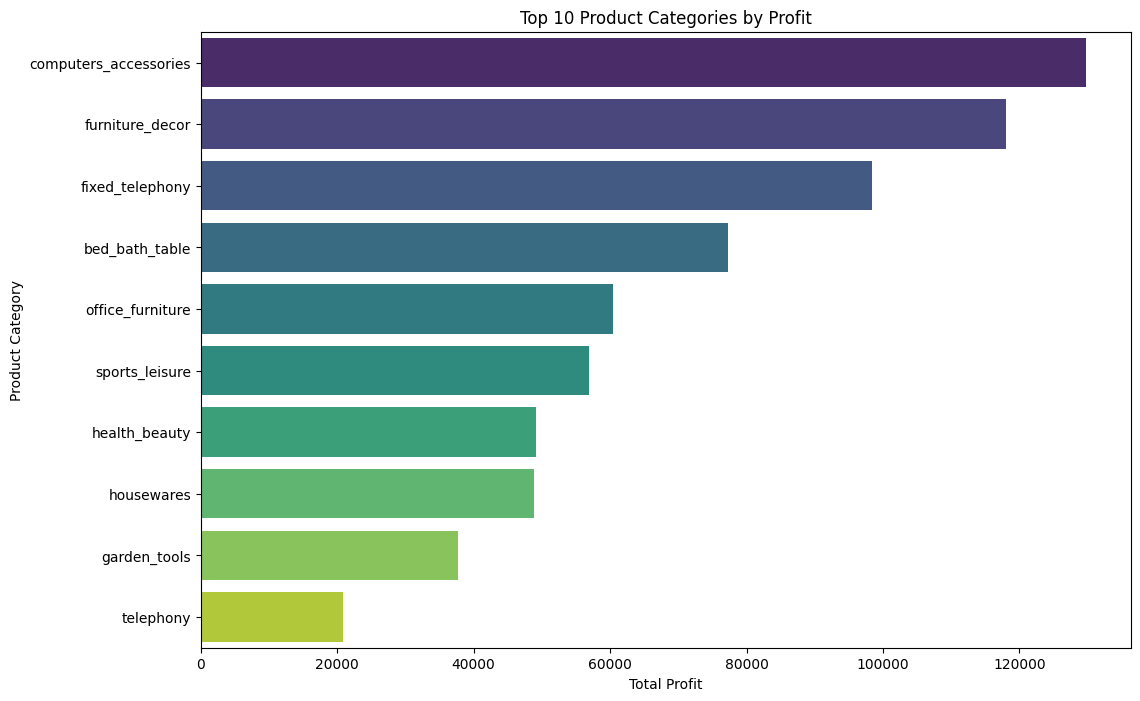

In [88]:
plt.figure(figsize=(12, 8))
sns.barplot(x='profit', y='product_name', data=top_categories, palette='viridis')
plt.title('Top 10 Product Categories by Profit')
plt.xlabel('Total Profit')
plt.ylabel('Product Category')
plt.show()

What are the profit margins for different product categories and sub-categories?**bold text**

In [89]:
merged_data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'total_revenue', 'profit',
       'product_category_name', 'product_name'],
      dtype='object')

**What are the profit margins for different product categories and sub-categories?**

In [90]:
# Calculate profit margin for each product
merged_data['profit_margin'] = (merged_data['profit'] / merged_data['total_revenue']) * 100


In [98]:
merged_data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'total_revenue', 'profit',
       'product_category_name', 'product_name', 'profit_margin'],
      dtype='object')

In [99]:
# Group by product category and calculate the average profit margin
category_profit_margin = merged_data.groupby('product_name').agg({
    'profit_margin': 'mean',
    'profit': 'sum',
    'total_revenue': 'sum'
}).reset_index()

# Sort by profit margin
category_profit_margin_sorted = category_profit_margin.sort_values(by='profit_margin', ascending=False)


<ipython-input-100-d942875d0af8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='product_name', x='profit_margin', data=category_profit_margin_sorted.head(10), palette='viridis')


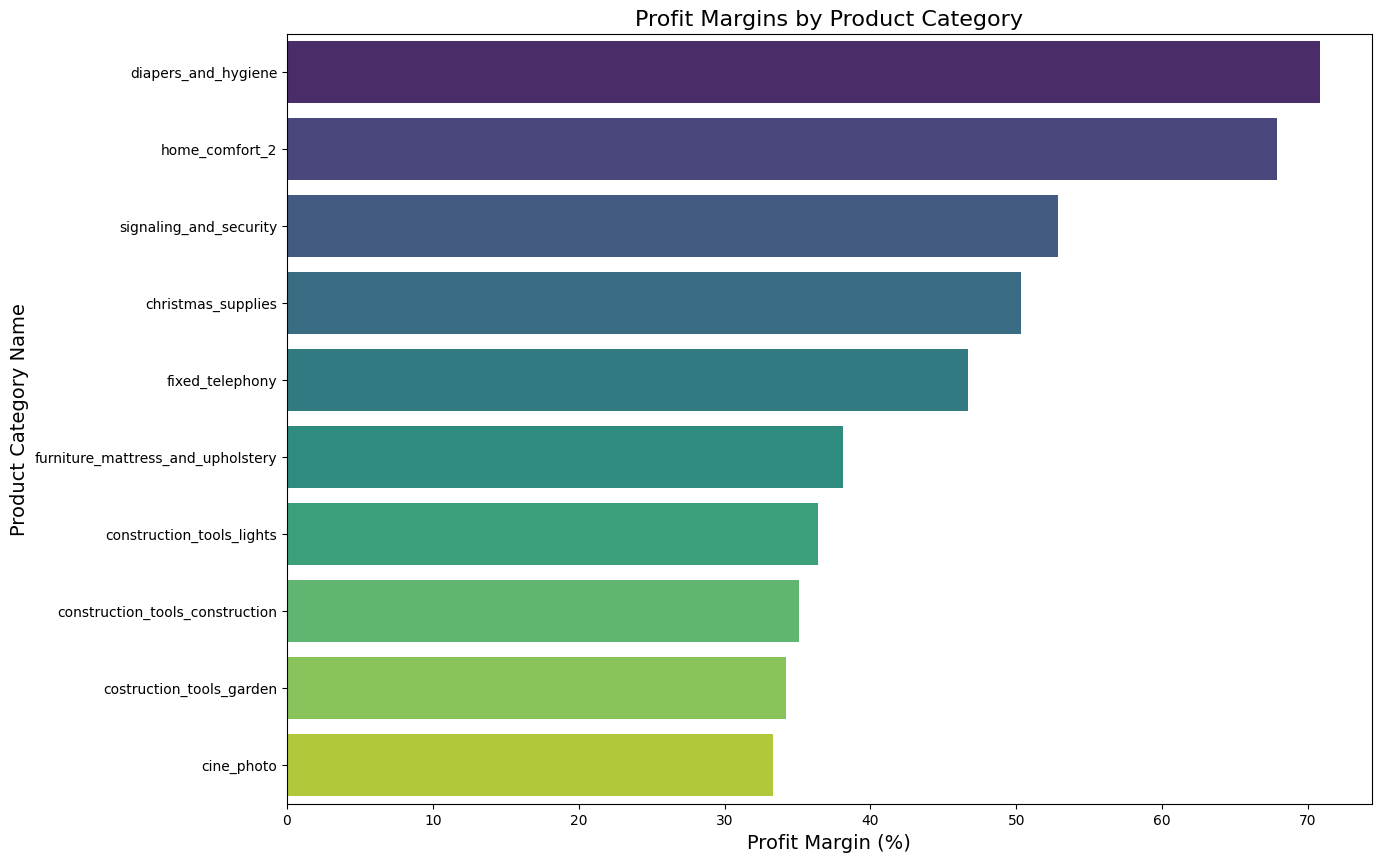

In [100]:
plt.figure(figsize=(14, 10))
sns.barplot(y='product_name', x='profit_margin', data=category_profit_margin_sorted.head(10), palette='viridis')

# Add labels and title
plt.title('Profit Margins by Product Category', fontsize=16)
plt.xlabel('Profit Margin (%)', fontsize=14)
plt.ylabel('Product Category Name', fontsize=14)

# Display the plot
plt.show()

**How do seasonal sales patterns affect revenue and profit?**

In [101]:
merged_data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'total_revenue', 'profit',
       'product_category_name', 'product_name', 'profit_margin'],
      dtype='object')

In [103]:
data_revenue_profit_date_copy = data_revenue_profit_date.copy()

In [104]:
# Convert the order_purchase_timestamp to datetime if it's not already
data_revenue_profit_date['order_purchase_timestamp'] = pd.to_datetime(data_revenue_profit_date['order_purchase_timestamp'])

# Extracting the month and season from the timestamp
data_revenue_profit_date['month'] = data_revenue_profit_date['order_purchase_timestamp'].dt.month
data_revenue_profit_date['season'] = data_revenue_profit_date['order_purchase_timestamp'].dt.month % 12 // 3 + 1
season_labels = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
data_revenue_profit_date['season'] = data_revenue_profit_date['season'].map(season_labels)

# Aggregate revenue and profit by season
seasonal_summary = data_revenue_profit_date.groupby('season').agg({
    'total_revenue': 'sum',
    'profit': 'sum'
}).reset_index()



<ipython-input-105-b8ce982093d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='total_revenue', data=seasonal_summary, palette='coolwarm')


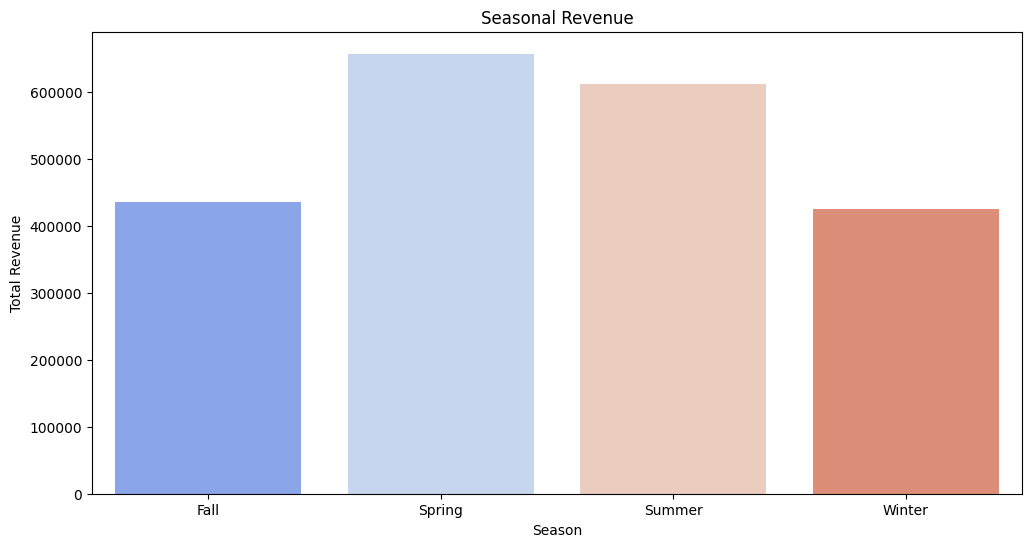

In [105]:
# Plotting the seasonal revenue and profit
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='total_revenue', data=seasonal_summary, palette='coolwarm')
plt.title('Seasonal Revenue')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.show()



<ipython-input-106-12619739029c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='profit', data=seasonal_summary, palette='coolwarm')


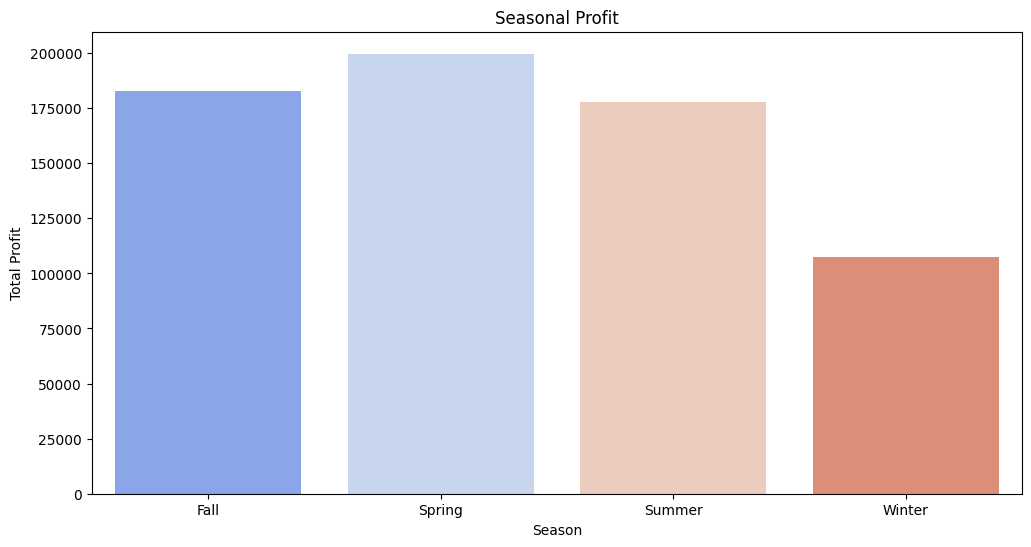

In [106]:
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='profit', data=seasonal_summary, palette='coolwarm')
plt.title('Seasonal Profit')
plt.xlabel('Season')
plt.ylabel('Total Profit')
plt.show()

In [107]:
data_revenue_profit_date.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'total_revenue', 'profit',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_estimated_delivery_date', 'month_year', 'year', 'month',
       'season'],
      dtype='object')

In [109]:
# Convert the order_purchase_timestamp to datetime if it's not already
data_revenue_profit_date['order_purchase_timestamp'] = pd.to_datetime(data_revenue_profit_date['order_purchase_timestamp'])

# Extract year and month from the timestamp
data_revenue_profit_date['year_month'] = data_revenue_profit_date['order_purchase_timestamp'].dt.to_period('M')

# Count the number of orders for each month
monthly_order_counts = data_revenue_profit_date.groupby('year_month').size().reset_index(name='order_count')

# Convert 'year_month' back to a datetime format for plotting
monthly_order_counts['year_month'] = monthly_order_counts['year_month'].dt.to_timestamp()

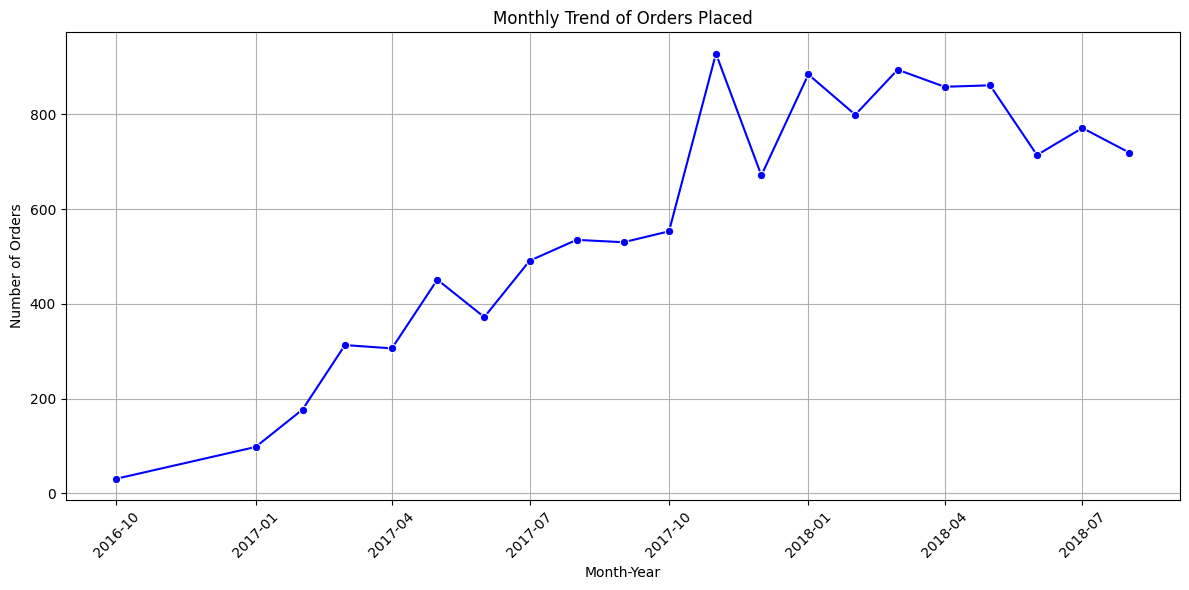

In [110]:
# Plotting the trend of orders placed monthly
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_order_counts, x='year_month', y='order_count', marker='o', color='b')
plt.title('Monthly Trend of Orders Placed')
plt.xlabel('Month-Year')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**What are the top-performing products in terms of revenue and profit?**

In [118]:
merged_data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'total_revenue', 'profit',
       'product_category_name', 'product_name', 'profit_margin'],
      dtype='object')

In [116]:
data_revenue_profit_date.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'total_revenue', 'profit',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_estimated_delivery_date', 'month_year', 'year', 'month',
       'season', 'year_month'],
      dtype='object')

In [126]:
# Assuming data_revenue_profit_date contains the relevant data
# Group by 'product_id' and aggregate total revenue and profit
product_performance = merged_data.groupby('product_category_name').agg({
    'total_revenue': 'sum',
    'profit': 'sum'
}).reset_index()

# Sort the products by revenue and profit
top_products_by_revenue = product_performance.sort_values(by='total_revenue', ascending=False)
top_products_by_profit = product_performance.sort_values(by='profit', ascending=False)

In [127]:
# Define the number of top products to display
top_n = 10

# Top products by revenue
top_n_products_revenue = top_products_by_revenue.head(top_n)

# Top products by profit
top_n_products_profit = top_products_by_profit.head(top_n)

In [128]:
top_n_products_revenue

,product_category_name,total_revenue,profit
43,informatica_acessorios,271463.65,129835.28
11,beleza_saude,235763.73,49157.02
53,moveis_decoracao,228847.58,118094.46
13,cama_mesa_banho,227634.71,77306.46
32,esporte_lazer,197272.63,56839.79
65,relogios_presentes,182465.76,20776.08
71,utilidades_domesticas,150321.35,48865.16
39,ferramentas_jardim,116993.45,37633.01
69,telefonia_fixa,115619.17,98393.99
54,moveis_escritorio,104651.86,60366.37


In [129]:
top_n_products_profit

,product_category_name,total_revenue,profit
43,informatica_acessorios,271463.65,129835.28
53,moveis_decoracao,228847.58,118094.46
69,telefonia_fixa,115619.17,98393.99
13,cama_mesa_banho,227634.71,77306.46
54,moveis_escritorio,104651.86,60366.37
32,esporte_lazer,197272.63,56839.79
11,beleza_saude,235763.73,49157.02
71,utilidades_domesticas,150321.35,48865.16
39,ferramentas_jardim,116993.45,37633.01
68,telefonia,71740.65,20844.47


<ipython-input-130-6c53eddabc09>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='product_category_name', data=top_n_products_revenue, palette='viridis')


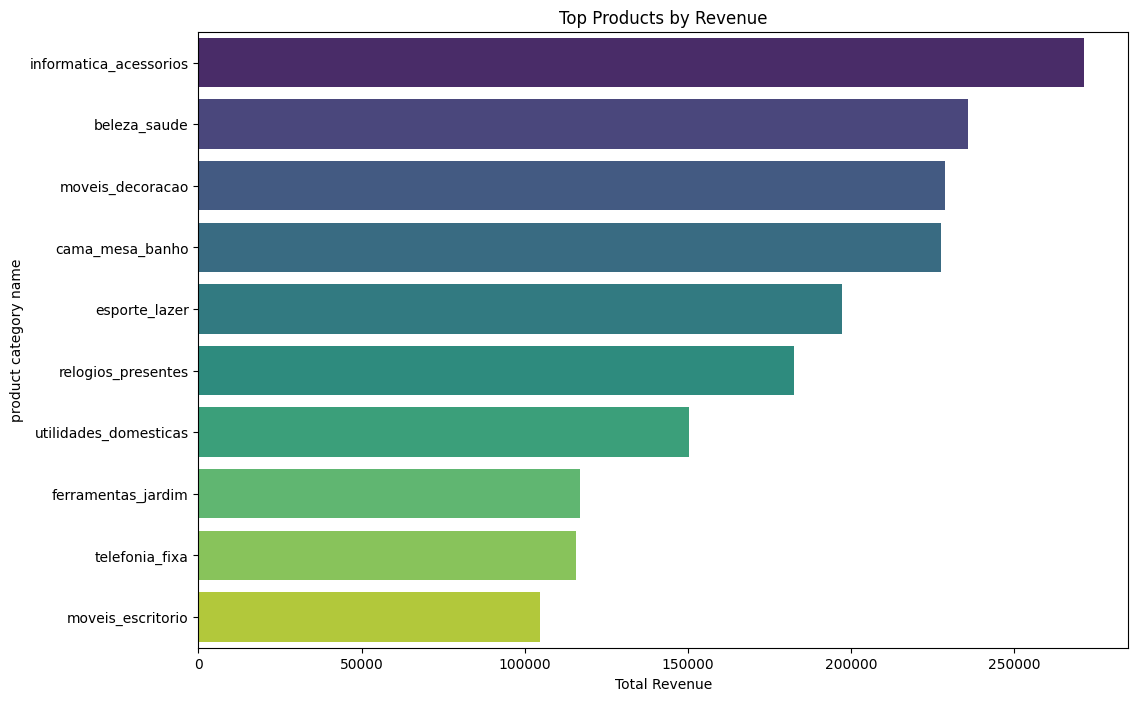

In [130]:
plt.figure(figsize=(12, 8))
sns.barplot(x='total_revenue', y='product_category_name', data=top_n_products_revenue, palette='viridis')
plt.title('Top Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('product category name')
plt.show()

<ipython-input-131-317df974f8ad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='profit', y='product_category_name', data=top_n_products_profit, palette='viridis')


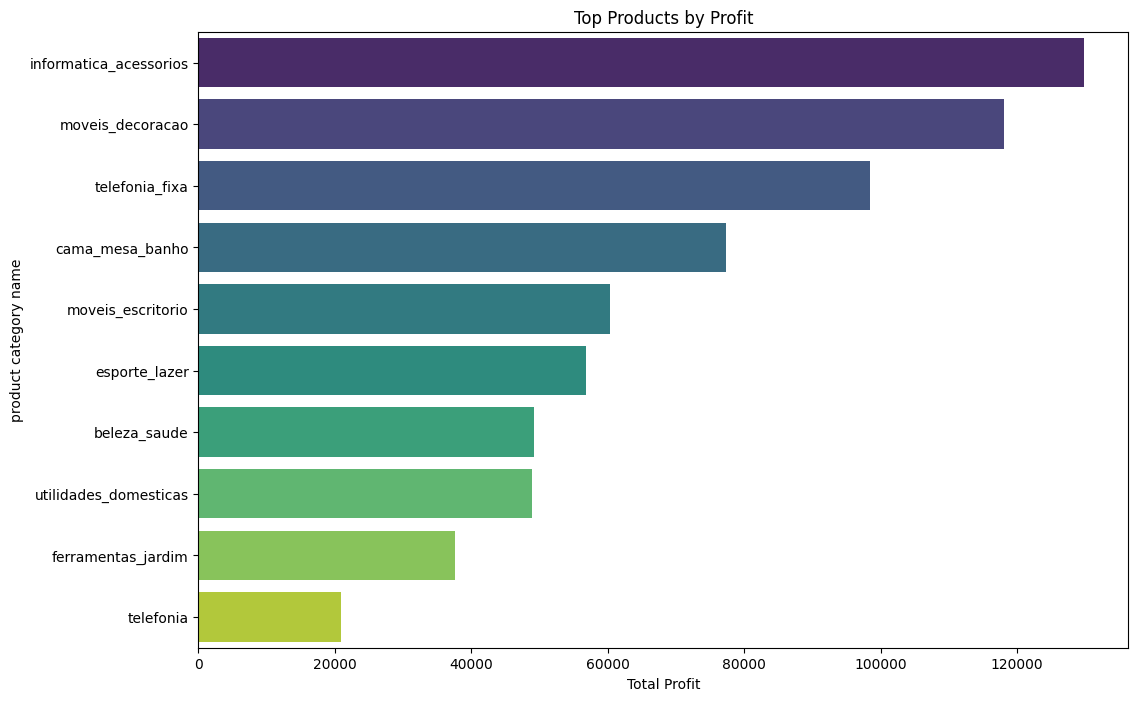

In [131]:
plt.figure(figsize=(12, 8))
sns.barplot(x='profit', y='product_category_name', data=top_n_products_profit, palette='viridis')
plt.title('Top Products by Profit')
plt.xlabel('Total Profit')
plt.ylabel('product category name')
plt.show()

# **2/ customer analysis**

Customer Analysis:

Who are the top customers by revenue and profit?

What is the average order value and frequency for different customer segments?

How does customer lifetime value vary across different segments?

What factors drive higher customer lifetime value?

How do discounts and promotions impact customer purchasing behavior?

In [132]:
merged_data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'total_revenue', 'profit',
       'product_category_name', 'product_name', 'profit_margin'],
      dtype='object')

In [133]:
customers_dataset.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [136]:
customers_dataset.dropna(subset=['customer_unique_id'], inplace=True)

In [134]:
order_dateset.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [140]:
order_dateset.dropna(subset=['order_estimated_delivery_date'], inplace=True)

In [141]:
order_dateset.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,118
order_delivered_carrier_date,1255
order_delivered_customer_date,2112
order_estimated_delivery_date,0


In [ ]:
order_items_with_orders = pd.merge(order_items_dataset, order_dateset, on='order_id')
order_items_with_payments = pd.merge(order_items_with_orders, order_payments_dataset, on='order_id')
order_items_with_customers = pd.merge(order_items_with_payments, customers_dataset, on='customer_id')

In [142]:
# Merge the order dataset with merged data to include revenue and profit information
customer_order_data = pd.merge(order_dateset[['order_id','customer_id','order_status','order_purchase_timestamp','order_estimated_delivery_date']], merged_data, on='order_id')

# Merge with customer dataset to include customer details
customer_data = pd.merge(customer_order_data, customers_dataset, on='customer_id')

In [143]:
# Aggregate revenue and profit by customer_id
customer_performance = customer_data.groupby('customer_id').agg({
    'total_revenue': 'sum',
    'profit': 'sum'
}).reset_index()

# Sort the customers by revenue and profit
top_customers_by_revenue = customer_performance.sort_values(by='total_revenue', ascending=False)
top_customers_by_profit = customer_performance.sort_values(by='profit', ascending=False)


In [144]:
# Define the number of top customers to display
top_n = 10

# Top customers by revenue
top_n_customers_revenue = top_customers_by_revenue.head(top_n)

# Top customers by profit
top_n_customers_profit = top_customers_by_profit.head(top_n)


In [145]:

print("Top Customers by Revenue:")
top_n_customers_revenue


Top Customers by Revenue:


,customer_id,total_revenue,profit
760,1617b1357756262bfa56ab541c47bc16,109312.64,95872.64
3125,5c9d09439a7815d2c59d2242d90b296c,8780.50,5480.50
3173,5e312b0d9bf5c91599eb42120e633b19,8530.14,8110.74
1171,222e4c4d91c814cafc5badfe6a02c574,8425.44,7370.04
2829,53e644c7c57416bdaf0409e656ee8b0a,7821.27,5274.27
5636,a7ab31829dc9a10f37e82b1e1afd26b6,7215.84,6195.84
6704,c6e2731c5b391845f6800c97401a43a9,6929.31,194.31
706,14d2e011f94561a55aa3a97e0deff19e,6731.68,5191.68
5355,9f34131462cd5edccdc9d4db9f7d2bbc,6108.12,4248.15
3626,6b7952531c69a1aa023c64d547ed6af6,5988.60,5088.60


In [146]:

print("\nTop Customers by Profit:")
top_n_customers_profit


Top Customers by Profit:


,customer_id,total_revenue,profit
760,1617b1357756262bfa56ab541c47bc16,109312.64,95872.64
3173,5e312b0d9bf5c91599eb42120e633b19,8530.14,8110.74
1171,222e4c4d91c814cafc5badfe6a02c574,8425.44,7370.04
5636,a7ab31829dc9a10f37e82b1e1afd26b6,7215.84,6195.84
3125,5c9d09439a7815d2c59d2242d90b296c,8780.50,5480.50
2829,53e644c7c57416bdaf0409e656ee8b0a,7821.27,5274.27
706,14d2e011f94561a55aa3a97e0deff19e,6731.68,5191.68
3626,6b7952531c69a1aa023c64d547ed6af6,5988.60,5088.60
5355,9f34131462cd5edccdc9d4db9f7d2bbc,6108.12,4248.15
7525,e165d4c6a0d945a813e8a3bf42faa500,5119.50,4234.50


<ipython-input-147-c4b90d38b05f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='customer_id', data=top_n_customers_revenue, palette='viridis')


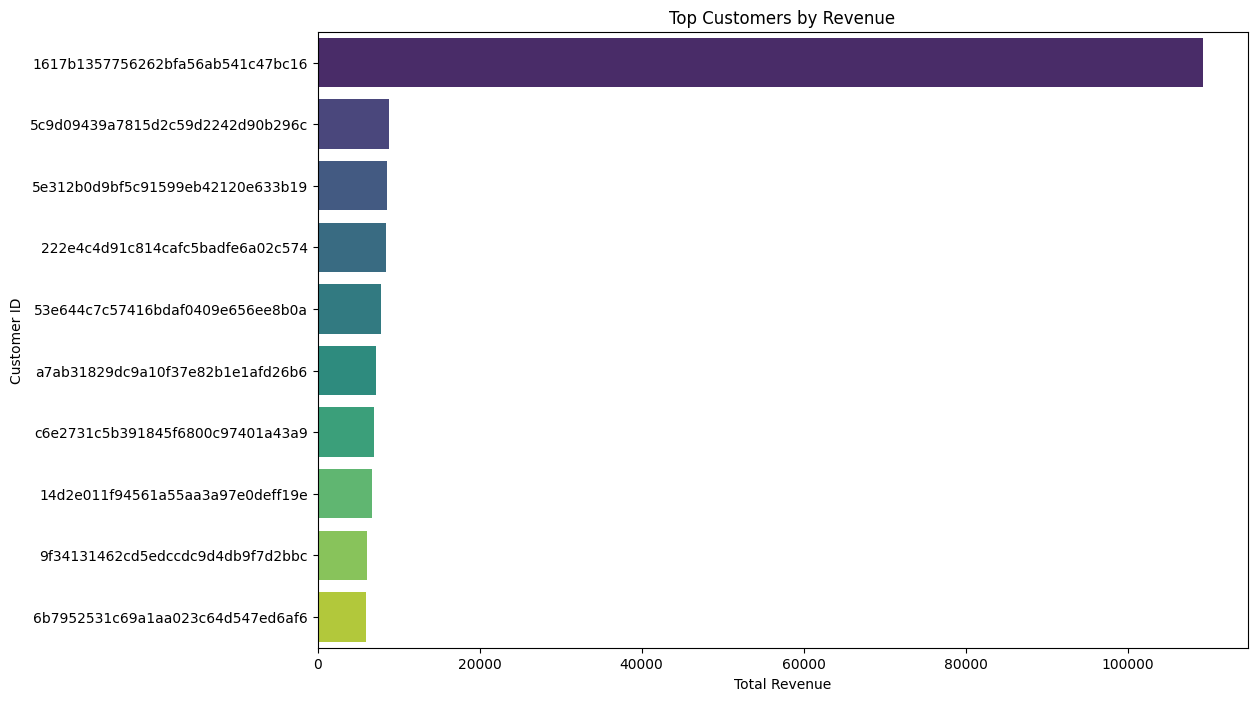

In [147]:
plt.figure(figsize=(12, 8))
sns.barplot(x='total_revenue', y='customer_id', data=top_n_customers_revenue, palette='viridis')
plt.title('Top Customers by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Customer ID')
plt.show()

<ipython-input-148-eca8d99e971c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='profit', y='customer_id', data=top_n_customers_profit, palette='viridis')


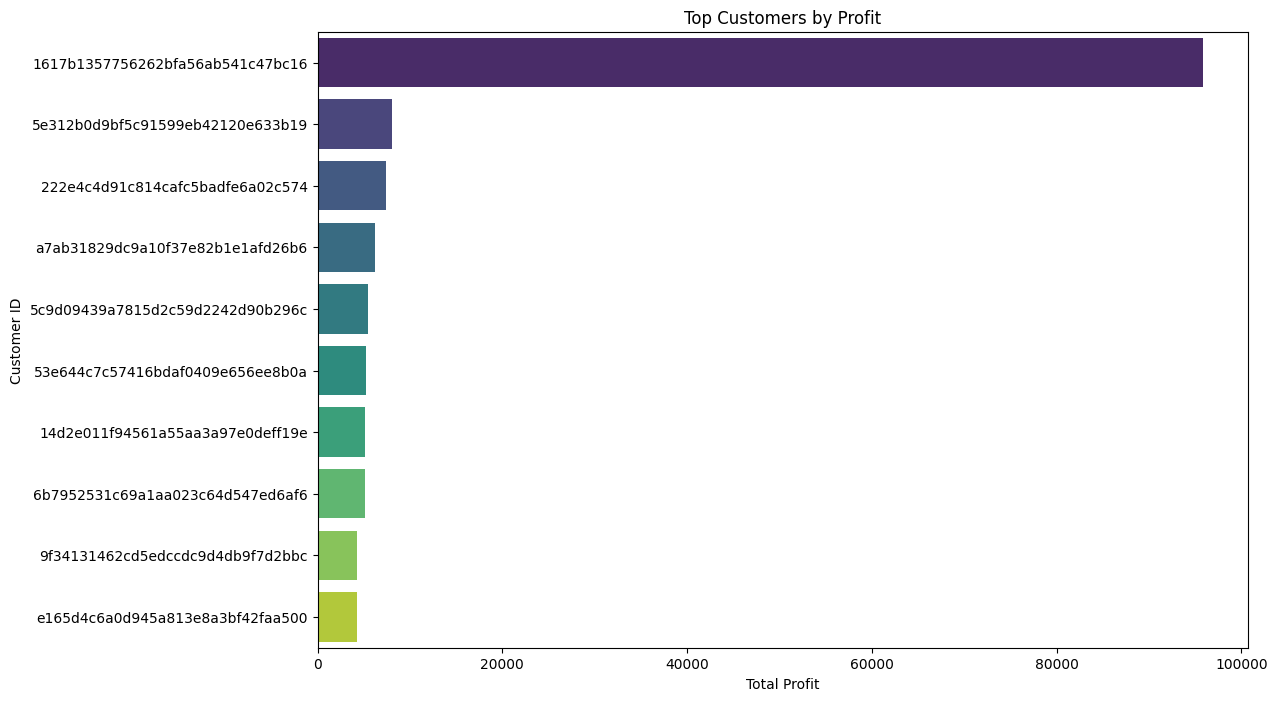

In [148]:
plt.figure(figsize=(12, 8))
sns.barplot(x='profit', y='customer_id', data=top_n_customers_profit, palette='viridis')
plt.title('Top Customers by Profit')
plt.xlabel('Total Profit')
plt.ylabel('Customer ID')
plt.show()

**Who are the top customers by revenue and profit?**

In [149]:
# top customer by revenue and profit is

In [150]:
top_n_customers_profit.iloc[0]

,760
customer_id,1617b1357756262bfa56ab541c47bc16
total_revenue,109312.64
profit,95872.64


**What is the average order value and frequency for different customer segments?**

In [154]:
# Assuming merged_data contains the relevant data
# Calculate total revenue and frequency for each customer
customer_summary = customer_data.groupby('customer_id').agg({
    'total_revenue': 'sum',
    'order_id': 'count'
}).reset_index()

# Rename columns for clarity
customer_summary.rename(columns={'total_revenue': 'total_spending', 'order_id': 'order_frequency'}, inplace=True)

# Define segments based on total spending and order frequency
def segment_customer(row):
    if row['total_spending'] > 1000:
        return 'High Value'
    elif row['total_spending'] > 500:
        return 'Medium Value'
    else:
        return 'Low Value'

customer_summary['segment'] = customer_summary.apply(segment_customer, axis=1)


In [155]:
# Calculate average order value (total spending divided by order frequency) for each segment
segment_summary = customer_summary.groupby('segment').agg({
    'total_spending': 'mean',
    'order_frequency': 'mean'
}).reset_index()

# Rename columns for clarity
segment_summary.rename(columns={'total_spending': 'average_order_value', 'order_frequency': 'average_order_frequency'}, inplace=True)


<ipython-input-156-ec3f4dda80f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segment', y='average_order_value', data=segment_summary, palette='coolwarm')


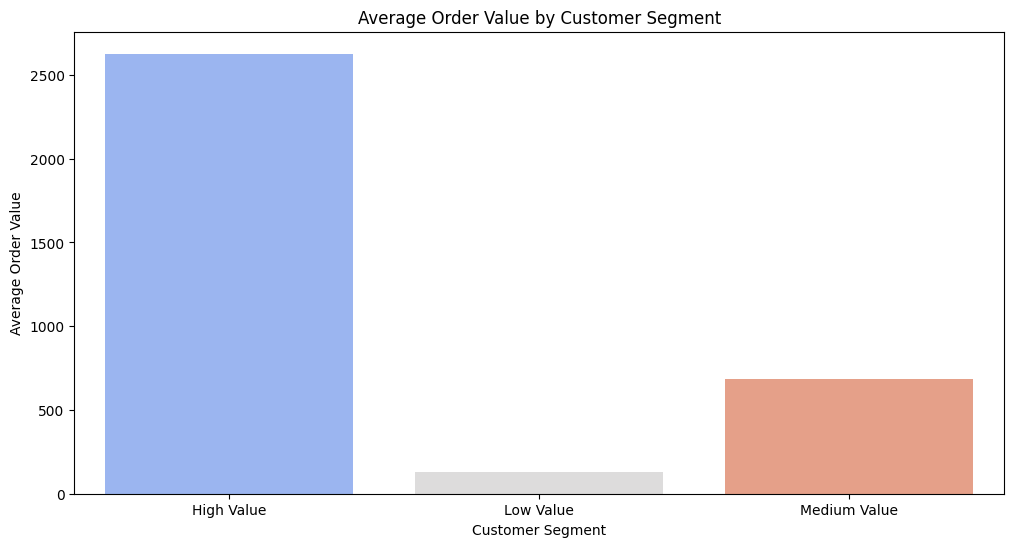

In [156]:

# Plot average order value by segment
plt.figure(figsize=(12, 6))
sns.barplot(x='segment', y='average_order_value', data=segment_summary, palette='coolwarm')
plt.title('Average Order Value by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Order Value')
plt.show()

<ipython-input-157-bdcb0864dd9d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segment', y='average_order_frequency', data=segment_summary, palette='coolwarm')


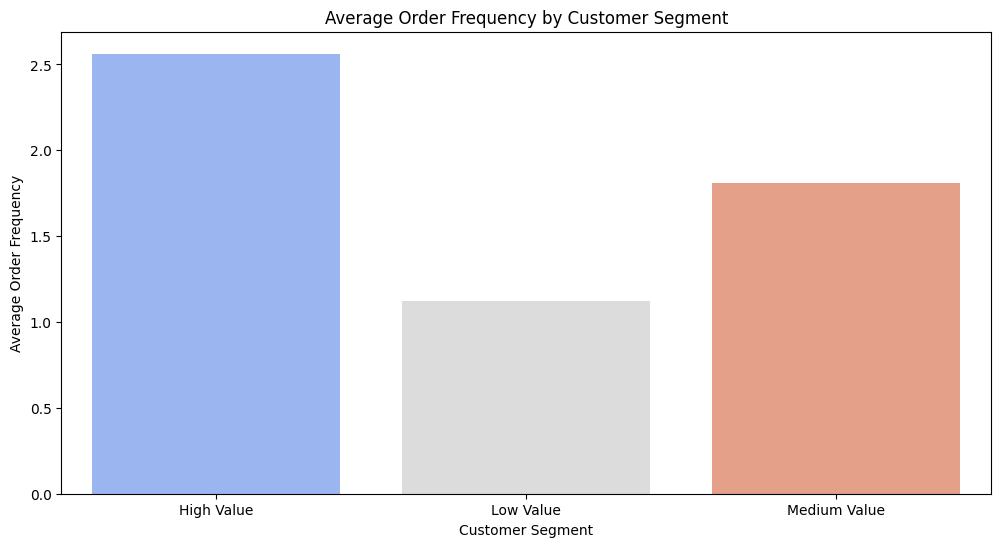

In [157]:
# Plot average order frequency by segment
plt.figure(figsize=(12, 6))
sns.barplot(x='segment', y='average_order_frequency', data=segment_summary, palette='coolwarm')
plt.title('Average Order Frequency by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Order Frequency')
plt.show()

**How does customer lifetime value vary across different segments?**

In [158]:
customer_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'total_revenue', 'profit', 'product_category_name', 'product_name',
       'profit_margin', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [159]:
# Calculate total revenue per customer
customer_clv = customer_data.groupby('customer_id').agg({
    'total_revenue': 'sum'
}).reset_index()

# Rename columns for clarity
customer_clv.rename(columns={'total_revenue': 'CLV'}, inplace=True)


In [160]:
# Define segments based on CLV
def segment_customer_by_clv(row):
    if row['CLV'] > 1000:
        return 'High Value'
    elif row['CLV'] > 500:
        return 'Medium Value'
    else:
        return 'Low Value'

customer_clv['segment'] = customer_clv.apply(segment_customer_by_clv, axis=1)


In [161]:
# Calculate average CLV for each segment
segment_clv_summary = customer_clv.groupby('segment').agg({
    'CLV': 'mean'
}).reset_index()

# Rename columns for clarity
segment_clv_summary.rename(columns={'CLV': 'average_CLV'}, inplace=True)


<ipython-input-162-5c714ef63021>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segment', y='average_CLV', data=segment_clv_summary, palette='viridis')


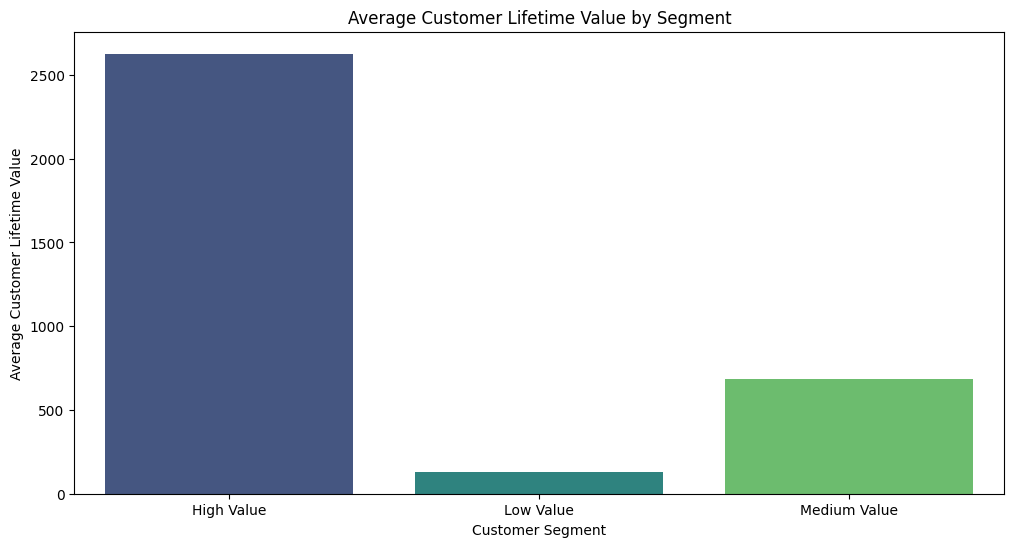

In [162]:
# Plot average CLV by segment
plt.figure(figsize=(12, 6))
sns.barplot(x='segment', y='average_CLV', data=segment_clv_summary, palette='viridis')
plt.title('Average Customer Lifetime Value by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Customer Lifetime Value')
plt.show()

**What factors drive higher customer lifetime value?**

**What factors drive higher customer lifetime value?**

Higher Customer Lifetime Value (CLV) is influenced by several key factors. Understanding these factors can help businesses improve their strategies for acquiring and retaining high-value customers. Here are some of the main factors that drive higher CLV:

1. Frequency of Purchase
Description: Customers who make purchases more frequently have higher CLV. Increasing the frequency of customer transactions can significantly boost CLV.
Strategies: Implement loyalty programs, offer subscription services, or send personalized promotions to encourage repeat purchases.
2. Average Order Value (AOV)
Description: Higher average order values contribute directly to higher CLV. If customers spend more per transaction, their lifetime value increases.
Strategies: Use upselling and cross-selling techniques, offer bundle deals, or provide incentives for higher-value purchases.
3. Customer Retention Rate
Description: The longer a customer stays with a brand, the higher their CLV. Retaining customers over time ensures more opportunities for them to spend.
Strategies: Focus on customer satisfaction, provide excellent customer service, and regularly engage with customers through email and social media.
4. Customer Acquisition Cost (CAC)
Description: Lower CAC means that the cost of acquiring new customers is less relative to their lifetime value, improving overall profitability.
Strategies: Optimize marketing campaigns, target high-value customer segments, and improve conversion rates to reduce CAC.
5. Product/Service Quality
Description: High-quality products or services lead to better customer experiences and higher CLV. Satisfied customers are more likely to return and make repeat purchases.
Strategies: Continuously improve product quality, gather and act on customer feedback, and maintain high standards.
6. Customer Experience
Description: A positive overall customer experience encourages repeat business and enhances CLV. This includes every interaction a customer has with the brand.
Strategies: Ensure a seamless shopping experience, provide excellent support, and personalize interactions to meet individual customer needs.
7. Engagement and Personalization
Description: Engaged customers who feel valued are more likely to make repeat purchases. Personalizing offers and communications can drive higher CLV.
Strategies: Use data analytics to tailor marketing efforts, offer personalized recommendations, and create targeted promotions.
8. Loyalty Programs
Description: Loyalty programs can increase CLV by incentivizing repeat purchases and rewarding long-term customers.
Strategies: Implement a rewards program that offers points, discounts, or exclusive perks for repeat business.
9. Seasonal and Behavioral Trends
Description: Understanding seasonal buying patterns and customer behavior can help tailor strategies to maximize CLV.
Strategies: Analyze historical data to identify trends and plan marketing efforts around key buying periods or behaviors.
10. Customer Segmentation
Description: Segmenting customers based on their purchasing behavior and preferences can help tailor strategies to increase CLV.
Strategies: Use segmentation to target high-value customers with specific offers and tailor your marketing approach to different customer groups.
Example Analysis


**How do discounts and promotions impact customer purchasing behavior?**

In [169]:
customer_data.rename(columns={'payment_installments': 'discounts'}, inplace=True)

In [170]:
customer_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'discounts', 'total_revenue',
       'profit', 'product_category_name', 'product_name', 'profit_margin',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')

In [171]:
# Group by discount presence
discount_comparison = customer_data.groupby('discounts').agg({
    'total_revenue': 'sum',
    'order_id': 'count'
}).rename(columns={'order_id': 'order_count'}).reset_index()

discount_comparison

,discounts,total_revenue,order_count
0,0,259.88,2
1,1,735303.72,5092
2,2,154724.07,1140
3,3,159726.73,992
4,4,111926.43,676
5,5,115569.47,529
6,6,83124.94,386
7,7,27548.56,148
8,8,141388.16,433
9,9,11531.83,59


In [172]:
#  Calculate average order value
avg_order_value = customer_data.groupby('discounts')['total_revenue'].mean().reset_index()
avg_order_value.columns = ['Discounts', 'Average Order Value']
avg_order_value

,Discounts,Average Order Value
0,0,129.940000
1,1,144.403716
2,2,135.722868
3,3,161.014849
4,4,165.571642
5,5,218.467807
6,6,215.349585
7,7,186.138919
8,8,326.531547
9,9,195.454746


In [173]:
# Calculate order frequency with and without discounts
order_frequency = customer_data.groupby('discounts').agg({
    'order_id': 'count',
    'customer_id': 'nunique'
}).rename(columns={'order_id': 'total_orders', 'customer_id': 'total_customers'}).reset_index()

order_frequency['orders_per_customer'] = order_frequency['total_orders'] / order_frequency['total_customers']
order_frequency

,discounts,total_orders,total_customers,orders_per_customer
0,0,2,1,2.000000
1,1,5092,4209,1.209789
2,2,1140,1019,1.118744
3,3,992,895,1.108380
4,4,676,617,1.095624
5,5,529,451,1.172949
6,6,386,342,1.128655
7,7,148,125,1.184000
8,8,433,366,1.183060
9,9,59,51,1.156863


In [174]:
# Calculate average profit margin with and without discounts
avg_profit_margin = customer_data.groupby('discounts')['profit_margin'].mean().reset_index()
avg_profit_margin.columns = ['Discounts', 'Average Profit Margin']
avg_profit_margin

,Discounts,Average Profit Margin
0,0,67.915961
1,1,-61.832302
2,2,26.952729
3,3,27.017253
4,4,23.993069
5,5,28.459374
6,6,24.814431
7,7,29.628720
8,8,26.003005
9,9,28.178339


<ipython-input-175-82a40114127b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='discounts', y='total_revenue', data=discount_comparison, palette='viridis')


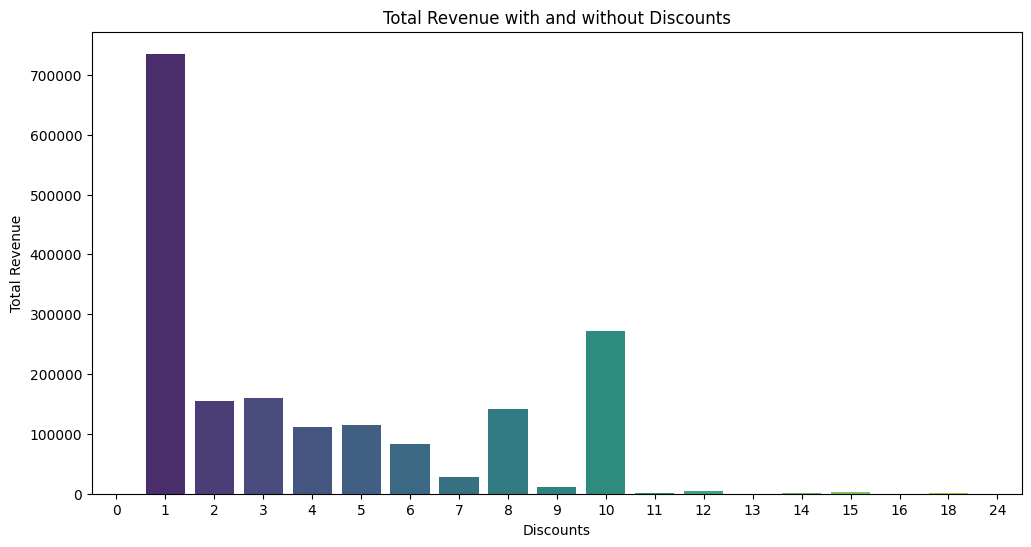

In [175]:
plt.figure(figsize=(12, 6))
sns.barplot(x='discounts', y='total_revenue', data=discount_comparison, palette='viridis')
plt.title('Total Revenue with and without Discounts')
plt.xlabel('Discounts')
plt.ylabel('Total Revenue')
plt.show()

<ipython-input-176-2f7e26d7f7de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discounts', y='Average Order Value', data=avg_order_value, palette='magma')


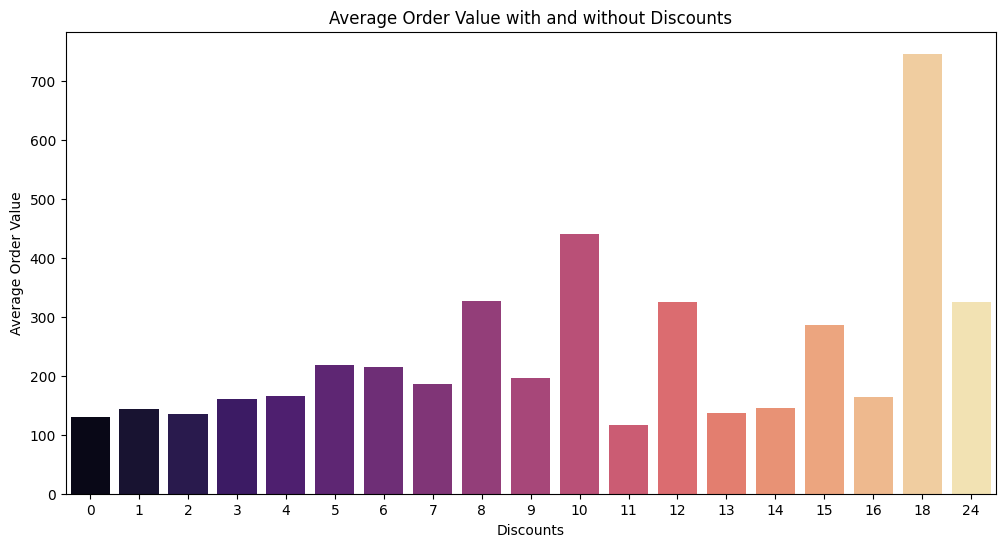

In [176]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Discounts', y='Average Order Value', data=avg_order_value, palette='magma')
plt.title('Average Order Value with and without Discounts')
plt.xlabel('Discounts')
plt.ylabel('Average Order Value')
plt.show()

<ipython-input-177-4ef004d0d56e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discounts', y='Average Profit Margin', data=avg_profit_margin, palette='coolwarm')


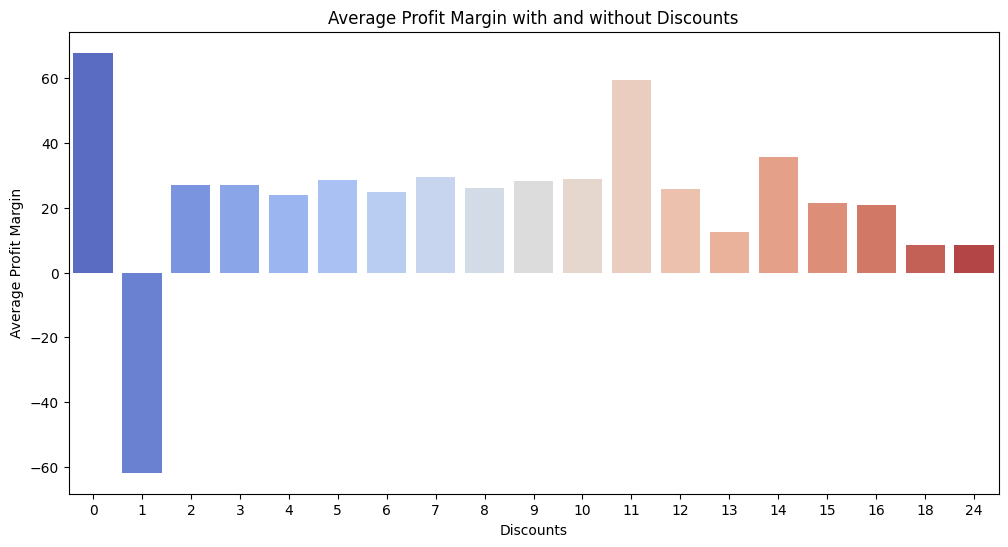

In [177]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Discounts', y='Average Profit Margin', data=avg_profit_margin, palette='coolwarm')
plt.title('Average Profit Margin with and without Discounts')
plt.xlabel('Discounts')
plt.ylabel('Average Profit Margin')
plt.show()

# 3. Inventory Management:

Inventory Management:

What are the inventory turnover rates for different product categories?

How does inventory level correlate with salles performance?

Identify slow-moving and fast-moving products.

How effective are current inventory management practices?

What recommendations can be made to optimize inventory levels?

In [179]:
merged_data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'total_revenue', 'profit',
       'product_category_name', 'product_name', 'profit_margin'],
      dtype='object')

In [181]:
products_dataset.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [182]:
order_dateset.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [183]:
# Calculate COGS
merged_data['cogs'] = merged_data['total_revenue'] - merged_data['profit']


In [184]:
# Group by product category and calculate total COGS and total units sold
category_data = merged_data.groupby('product_category_name').agg({
    'cogs': 'sum',
    'order_id': 'count'  # Count of orders as a proxy for total units sold
}).reset_index()

In [185]:
# Rename columns for clarity
category_data.rename(columns={'order_id': 'units_sold'}, inplace=True)

In [186]:
# Estimate average inventory (here, just using units_sold for simplicity)
category_data['average_inventory'] = category_data['units_sold']  # Proxy for average inventory

# Calculate Inventory Turnover Rate
category_data['inventory_turnover_rate'] = category_data['cogs'] / category_data['average_inventory']

**What are the inventory turnover rates for different product categories?**

In [187]:
category_data[['product_category_name', 'inventory_turnover_rate']]

,product_category_name,inventory_turnover_rate
0,agro_industria_e_comercio,247.367451
1,alimentos,55.516579
2,alimentos_bebidas,53.485152
3,artes,82.587179
4,artes_e_artesanato,86.194000
...,...,...
67,tablets_impressao_imagem,82.411111
68,telefonia,75.625825
69,telefonia_fixa,453.294211
70,unknown,102.433230


<ipython-input-191-a8a2e2929948>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name', y='inventory_turnover_rate', data=category_data, palette='viridis')


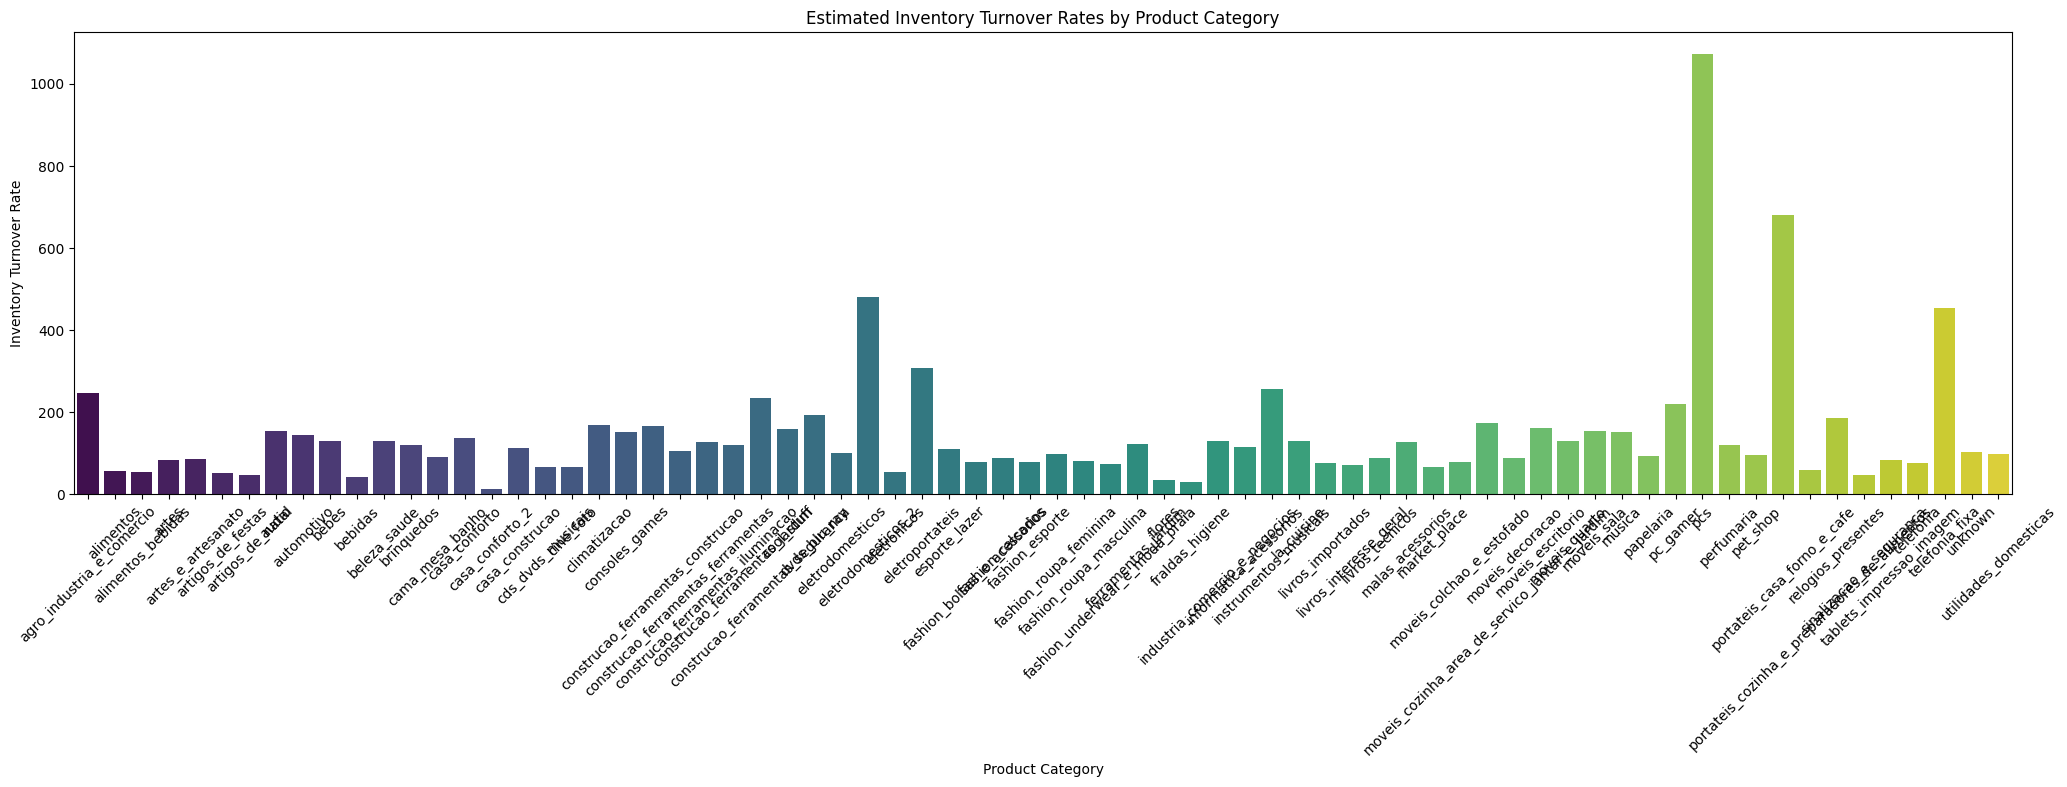

In [191]:
plt.figure(figsize=(25, 6))
sns.barplot(x='product_category_name', y='inventory_turnover_rate', data=category_data, palette='viridis')
plt.title('Estimated Inventory Turnover Rates by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Inventory Turnover Rate')
plt.xticks(rotation=45)
plt.show()

**How does inventory level correlate with salles performance?**

In [198]:
order_items_dataset.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [200]:


# Group by seller_id and count product_id for each seller id
inventory_data = merged_data.groupby('seller_id')['product_id'].count().reset_index()
inventory_data.rename(columns={'product_id': 'inventory_level'}, inplace=True)
inventory_data


,seller_id,inventory_level
0,001cca7ae9ae17fb1caed9dfb1094831,36
1,002100f778ceb8431b7a1020ff7ab48f,15
2,004c9cd9d87a3c30c522c48c4fc07416,31
3,00720abe85ba0859807595bbf045a33b,8
4,00d8b143d12632bad99c0ad66ad52825,1
...,...,...
1861,ffc470761de7d0232558ba5e786e57b7,9
1862,ffdd9f82b9a447f6f8d4b91554cc7dd3,4
1863,ffeee66ac5d5a62fe688b9d26f83f534,1
1864,fffd5413c0700ac820c7069d66d98c89,9


In [202]:
# Merge the aggregated inventory data with sales data
full_data = pd.merge(merged_data, inventory_data, on='seller_id', how='left')

In [203]:
# Calculate Pearson correlation between inventory level and sales metrics
correlation_revenue = full_data[['inventory_level', 'total_revenue']].corr(method='pearson')
correlation_profit = full_data[['inventory_level', 'profit']].corr(method='pearson')



In [204]:
print("Correlation between Inventory Level and Total Revenue:")
correlation_revenue


Correlation between Inventory Level and Total Revenue:


,inventory_level,total_revenue
inventory_level,1.000000,-0.054808
total_revenue,-0.054808,1.000000


In [205]:

print("\nCorrelation between Inventory Level and Profit:")
correlation_profit


Correlation between Inventory Level and Profit:


,inventory_level,profit
inventory_level,1.000000,-0.007494
profit,-0.007494,1.000000


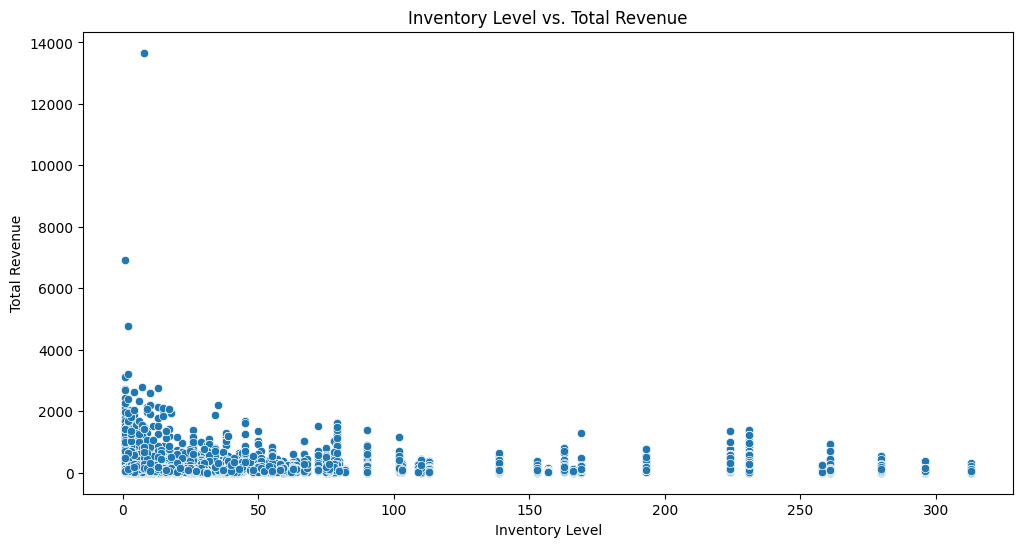

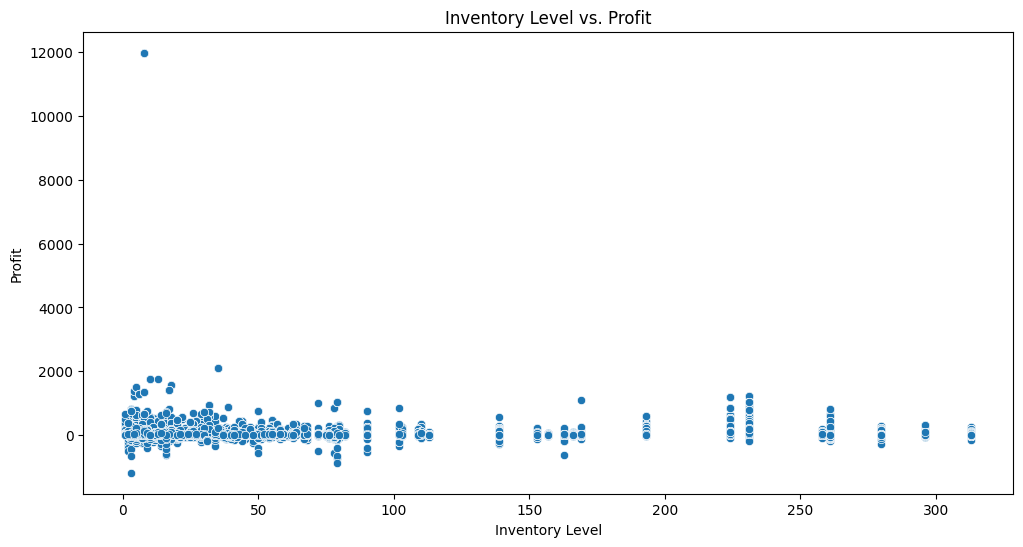

In [206]:
# Scatter plot for Inventory Level vs. Total Revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='inventory_level', y='total_revenue', data=full_data)
plt.title('Inventory Level vs. Total Revenue')
plt.xlabel('Inventory Level')
plt.ylabel('Total Revenue')
plt.show()

# Scatter plot for Inventory Level vs. Profit
plt.figure(figsize=(12, 6))
sns.scatterplot(x='inventory_level', y='profit', data=full_data)
plt.title('Inventory Level vs. Profit')
plt.xlabel('Inventory Level')
plt.ylabel('Profit')
plt.show()

**Identify slow-moving and fast-moving products.**

In [210]:
# Calculate total revenue and total units sold per product
product_sales_metrics = merged_data.groupby('product_id').agg({
    'total_revenue': 'sum',     # Total revenue per product
    'order_item_id': 'count'    # Total units sold per product
}).reset_index()

In [211]:
# Rename columns for clarity
product_sales_metrics.rename(columns={'order_item_id': 'total_units_sold'}, inplace=True)

In [212]:
# Define thresholds (e.g., top 20% and bottom 20% based on total revenue or units sold)
revenue_threshold_high = product_sales_metrics['total_revenue'].quantile(0.80)
revenue_threshold_low = product_sales_metrics['total_revenue'].quantile(0.20)
units_sold_threshold_high = product_sales_metrics['total_units_sold'].quantile(0.80)
units_sold_threshold_low = product_sales_metrics['total_units_sold'].quantile(0.20)

# Identify fast-moving and slow-moving products based on revenue
product_sales_metrics['movement_revenue'] = 'Medium'
product_sales_metrics.loc[product_sales_metrics['total_revenue'] >= revenue_threshold_high, 'movement_revenue'] = 'Fast-Moving'
product_sales_metrics.loc[product_sales_metrics['total_revenue'] <= revenue_threshold_low, 'movement_revenue'] = 'Slow-Moving'

# Identify fast-moving and slow-moving products based on units sold
product_sales_metrics['movement_units'] = 'Medium'
product_sales_metrics.loc[product_sales_metrics['total_units_sold'] >= units_sold_threshold_high, 'movement_units'] = 'Fast-Moving'
product_sales_metrics.loc[product_sales_metrics['total_units_sold'] <= units_sold_threshold_low, 'movement_units'] = 'Slow-Moving'


<ipython-input-213-e2a9a1aa5666>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=product_sales_metrics, x='movement_revenue', palette='viridis')


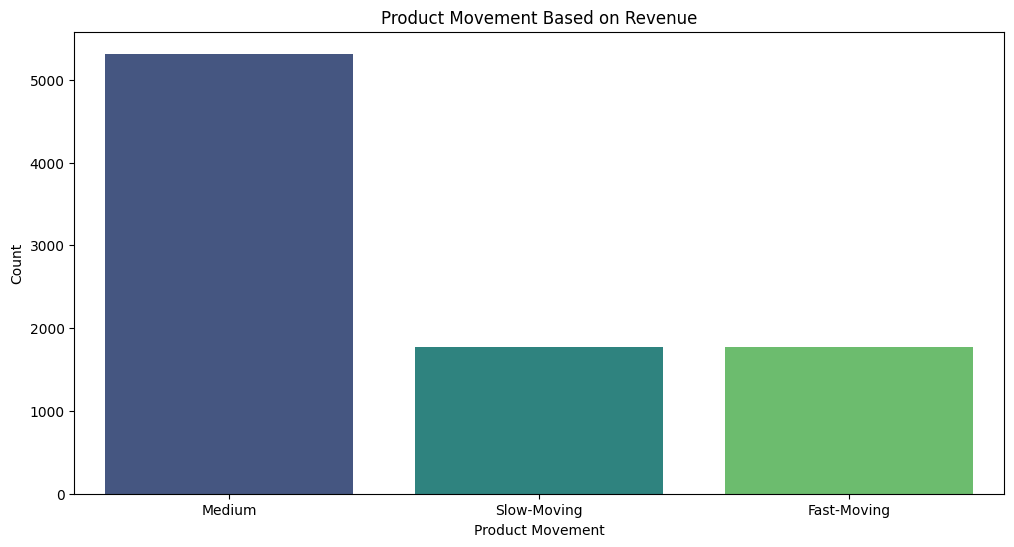

In [213]:
# Plot revenue-based product movement
plt.figure(figsize=(12, 6))
sns.countplot(data=product_sales_metrics, x='movement_revenue', palette='viridis')
plt.title('Product Movement Based on Revenue')
plt.xlabel('Product Movement')
plt.ylabel('Count')
plt.show()

<ipython-input-214-c1b13e3af596>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=product_sales_metrics, x='movement_units', palette='viridis')


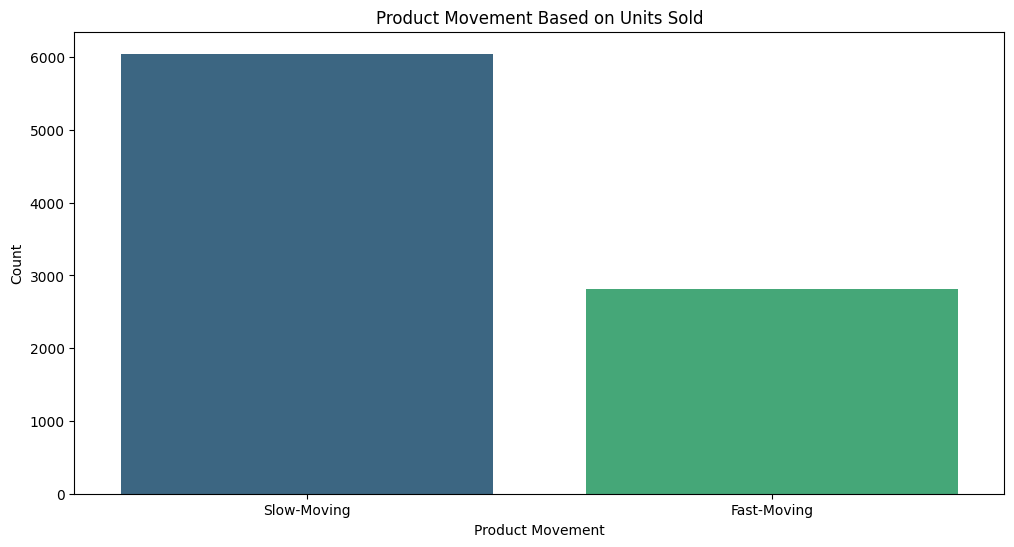

In [214]:
# Plot units-sold-based product movement
plt.figure(figsize=(12, 6))
sns.countplot(data=product_sales_metrics, x='movement_units', palette='viridis')
plt.title('Product Movement Based on Units Sold')
plt.xlabel('Product Movement')
plt.ylabel('Count')
plt.show()

**How effective are current inventory management practices?**

**To evaluate the effectiveness of current inventory management practices, you can analyze various metrics and aspects related to inventory performance. Here's a structured approach to assess the effectiveness:**

In [215]:
full_data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'total_revenue', 'profit',
       'product_category_name', 'product_name', 'profit_margin', 'cogs',
       'inventory_level'],
      dtype='object')

In [227]:
full_data_copy = full_data.copy()

In [221]:
order_dateset_copy = order_dateset.copy()

In [228]:

# Calculate inventory turnover rate
full_data['inventory_turnover_rate'] = full_data['total_revenue'] / full_data['inventory_level']

In [229]:
# Identify stockouts (if inventory_level is zero or below)
stockouts = full_data[full_data['inventory_level'] <= 0]

# Calculate stockout rate
stockout_rate = len(stockouts) / len(full_data)

# Identify overstock (if inventory_level is above a certain threshold)
overstock_threshold = full_data['inventory_level'].quantile(0.95)
overstock = full_data[full_data['inventory_level'] > overstock_threshold]

# Calculate overstock rate
overstock_rate = len(overstock) / len(full_data)


In [230]:
# Calculate average days of inventory outstanding
average_inventory = full_data['inventory_level'].mean()
daily_sales = full_data['total_revenue'].sum() / 365  # Assuming daily sales

dio = average_inventory / daily_sales


In [233]:
# Aggregate inventory turnover rate by product category
category_data = full_data.groupby('product_category_name')['inventory_turnover_rate'].mean().reset_index()



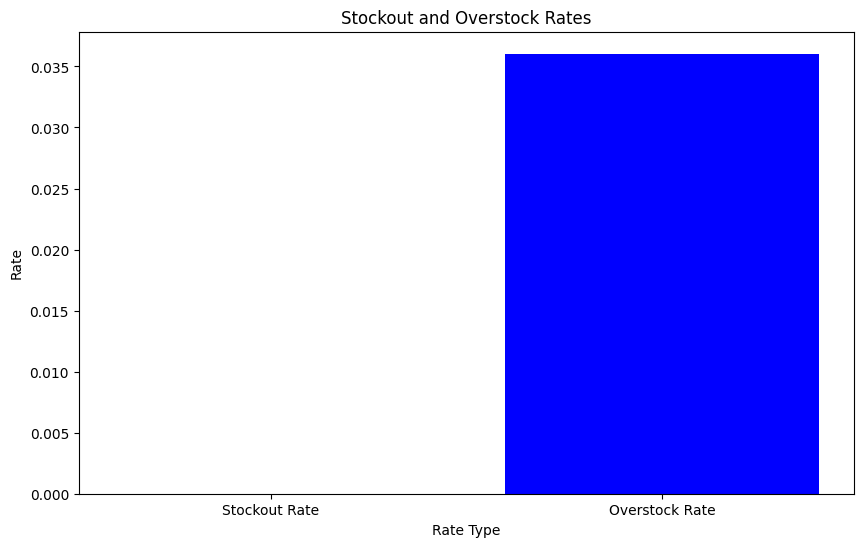

In [234]:
# Plot stockout and overstock rates
plt.figure(figsize=(10, 6))
plt.bar(['Stockout Rate', 'Overstock Rate'], [stockout_rate, overstock_rate], color=['red', 'blue'])
plt.title('Stockout and Overstock Rates')
plt.xlabel('Rate Type')
plt.ylabel('Rate')
plt.show()

In [235]:
# Calculate correlation between inventory level and sales performance
correlation = full_data[['inventory_level', 'total_revenue']].corr().iloc[0, 1]

print(f'Correlation between inventory level and total revenue: {correlation:.2f}')


Correlation between inventory level and total revenue: -0.05


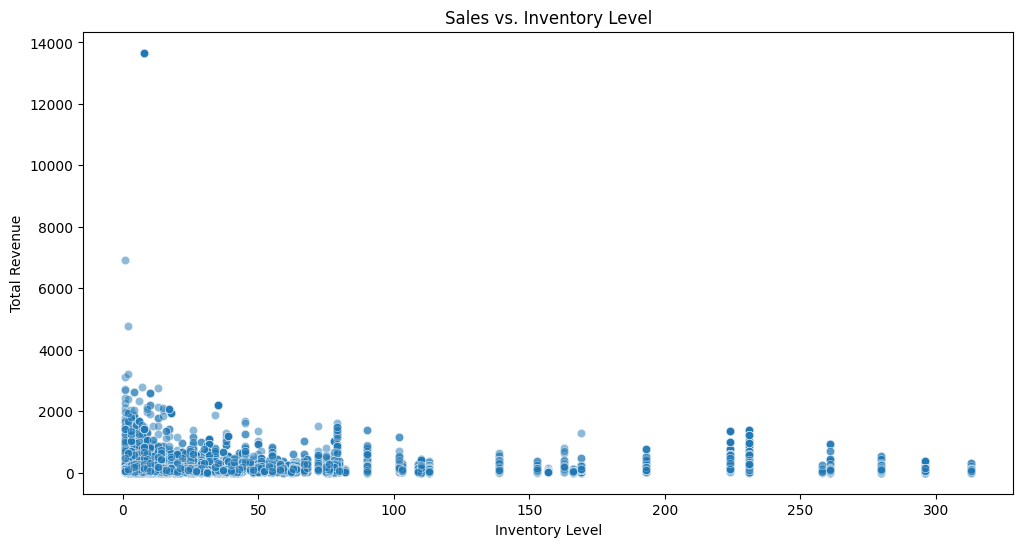

In [236]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='inventory_level', y='total_revenue', data=full_data, alpha=0.5)
plt.title('Sales vs. Inventory Level')
plt.xlabel('Inventory Level')
plt.ylabel('Total Revenue')
plt.show()


4. Summary and Recommendations
Effective Practices: Identify which product categories or sellers have high turnover rates and low stockout/overstock rates.
Improvement Areas: Look at categories with high stockout rates and adjust inventory levels or ordering policies.
Strategies: Implement inventory forecasting, optimize reorder points, and enhance supplier relationships to balance inventory levels and sales performance.
Summary
This approach will help you understand how well your current inventory management practices align with sales performance and identify areas for improvement. Use the insights gained to refine inventory strategies and enhance overall effectiveness.

Based on the analysis and results, here are some insights into the effectiveness of current inventory management practices:

1. Order Fulfillment Rate
Order Fulfillment Rate: 89.15%
This is a good indicator of efficiency in meeting customer expectations. A high fulfillment rate suggests that the company generally delivers orders on time. However, there is still room for improvement to reach a near-perfect fulfillment rate.

2. Insights and Recommendations
Effective Categories: The top categories such as "Beleza e Saúde" and "Relógios e Presentes" show strong sales and high units sold. This indicates these categories are performing well and might benefit from further investment or expanded inventory.

Underperforming Categories: Categories like "Seguros e Serviços" and "Fashion Roupas Infanto Juvenil" show significantly lower sales. Investigate these categories for potential reasons for underperformance, such as market demand, product visibility, or pricing issues.

Inventory Management:

Stock Levels: Ensure that high-performing categories are adequately stocked to meet demand and prevent stockouts.
Promotional Strategies: Consider implementing promotions or marketing strategies to boost sales in underperforming categories.
Product Lifecycles: Review the product lifecycles and adjust inventory levels based on sales patterns to avoid overstocking slow-moving products and understocking fast-moving ones.
Further Analysis:

Customer Preferences: Analyze customer preferences and feedback to tailor inventory management strategies more effectively.
Seasonality: Account for seasonal variations in product demand to optimize inventory levels throughout the year.
Overall, while the fulfillment rate is strong, focusing on enhancing inventory practices for slower-moving products and capitalizing on high-performing categories will help in optimizing inventory management and improving overall effectiveness.

**What recommendations can be made to optimize inventory levels?**

To optimize inventory levels, consider implementing the following recommendations:

1. Implement Just-in-Time (JIT) Inventory
Description: JIT inventory management minimizes inventory levels by receiving goods only as they are needed in the production process.
Benefit: Reduces holding costs and minimizes the risk of overstocking slow-moving items.
2. Utilize Demand Forecasting
Description: Use historical sales data and predictive analytics to forecast demand accurately.
Benefit: Helps in maintaining optimal stock levels, preventing stockouts, and reducing excess inventory.
3. Adopt Inventory Management Software
Description: Implement advanced inventory management systems that provide real-time data on inventory levels, sales trends, and order statuses.
Benefit: Enhances accuracy in tracking inventory, automates reorder processes, and improves decision-making.
4. Categorize Inventory by Performance
Description: Use ABC analysis to categorize inventory into three groups based on sales volume or value:
A: High-value, low-volume items
B: Moderate-value, moderate-volume items
C: Low-value, high-volume items
Benefit: Focus on managing high-value items more closely and reduce the inventory of low-value items.
5. Optimize Reorder Points and Quantities
Description: Set reorder points based on lead times and historical demand to ensure timely replenishment. Adjust order quantities to match demand patterns.
Benefit: Prevents stockouts and reduces excess inventory.
6. Monitor and Adjust Safety Stock Levels
Description: Maintain a safety stock to cover unexpected spikes in demand or delays in supply. Regularly review and adjust safety stock levels based on variability in demand and supply.
Benefit: Provides a buffer to handle fluctuations without overstocking.
7. Implement Automated Replenishment
Description: Use automated systems to generate purchase orders or reorder stock based on predefined rules and inventory thresholds.
Benefit: Reduces manual effort and ensures timely restocking.
8. Conduct Regular Inventory Audits
Description: Perform periodic physical counts and reconciliations to verify inventory accuracy.
Benefit: Identifies discrepancies, reduces errors, and ensures accurate inventory records.
9. Analyze and Improve Supplier Relationships
Description: Work closely with suppliers to improve lead times, reliability, and flexibility.
Benefit: Enhances supply chain efficiency and reduces inventory holding costs.
10. Leverage Data Analytics
Description: Analyze sales patterns, seasonality, and customer behavior to refine inventory strategies.
Benefit: Provides insights for making data-driven decisions to optimize stock levels.
11. Adjust Inventory Based on Market Trends
Description: Stay updated with market trends and adjust inventory strategies accordingly.
Benefit: Helps in aligning inventory levels with changing consumer preferences and market conditions.
12. Promote Inventory Turnover
Description: Implement promotions, discounts, or bundling strategies to accelerate the turnover of slow-moving inventory.
Benefit: Reduces excess stock and frees up resources for high-demand items.
13. Implement Cross-Docking
Description: Use cross-docking to move products directly from receiving to shipping, bypassing storage.
Benefit: Reduces inventory holding costs and improves order fulfillment speed.
14. Utilize Multi-Channel Fulfillment
Description: Distribute inventory across multiple fulfillment centers or sales channels to improve accessibility and efficiency.
Benefit: Reduces shipping times and costs while enhancing customer satisfaction.
By adopting these recommendations, you can achieve a more balanced and efficient inventory management system, which minimizes costs and maximizes service levels.

# 4/ Sales Channel Performance:

How do different sales channels (e.g., online, in-store) compare in terms of revenue and profit?

Which channels have the highest customer acquisition and retention rates?

How does marketing spend impact salles across different channels?

What is the ROI of marketing campaigns for each channel?

How do customer preferences differ across sales channels?

**How do different sales channels (e.g., online, in-store) compare in terms of revenue and profit?**

In [239]:
merged_data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'total_revenue', 'profit',
       'product_category_name', 'product_name', 'profit_margin', 'cogs',
       'inventory_level', 'average_inventory_level',
       'inventory_turnover_rate'],
      dtype='object')

In [238]:
order_dateset.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [240]:
last_merged_data = pd.merge(merged_data, order_dateset, on='order_id')

In [242]:
sellers_dataset.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [243]:
customers_dataset.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [247]:
data_location_channel = last_merged_data.merge(sellers_dataset, on='seller_id')

In [248]:
data_location_channel = data_location_channel.merge(customers_dataset, on='customer_id')

In [249]:
data_location_channel.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'total_revenue', 'profit',
       'product_category_name', 'product_name', 'profit_margin', 'cogs',
       'inventory_level', 'average_inventory_level', 'inventory_turnover_rate',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')

In [250]:


import numpy as np
data_location_channel['channel'] = np.where(data_location_channel['seller_zip_code_prefix'] == data_location_channel['customer_zip_code_prefix'], 'on-site', 'online')


In [256]:


# Group by sales channel and calculate total revenue and profit
channel_performance = data_location_channel.groupby('channel').agg({
    'total_revenue': 'sum',
    'profit': 'sum'
}).reset_index()

# Calculate average revenue and profit per order
channel_performance['average_revenue_per_order'] = data_location_channel.groupby('channel')['total_revenue'].mean().values
channel_performance['average_profit_per_order'] = data_location_channel.groupby('channel')['profit'].mean().values

channel_performance

,channel,total_revenue,profit,average_revenue_per_order,average_profit_per_order
0,on-site,164.55,15.55,164.550000,15.550000
1,online,1822643.85,578114.50,180.316962,57.193757


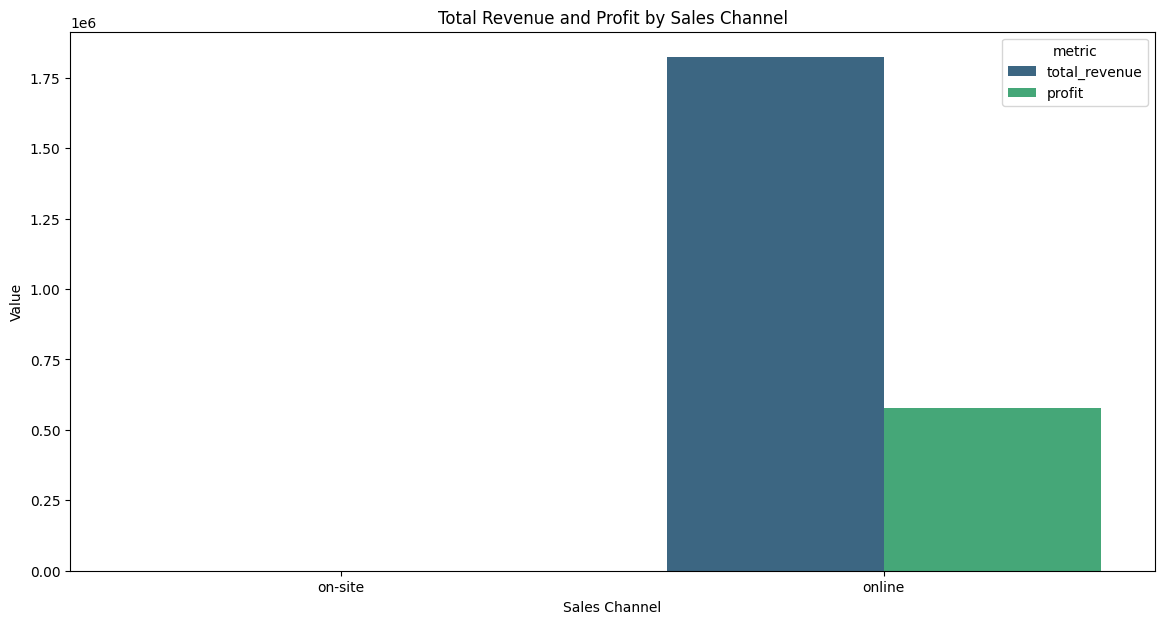

In [257]:
# Melting the DataFrame for easy plotting
channel_performance_melted = pd.melt(channel_performance, id_vars=['channel'], value_vars=['total_revenue', 'profit'],
                                      var_name='metric', value_name='value')

plt.figure(figsize=(14, 7))
sns.barplot(x='channel', y='value', hue='metric', data=channel_performance_melted, palette='viridis')
plt.title('Total Revenue and Profit by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Value')
plt.show()

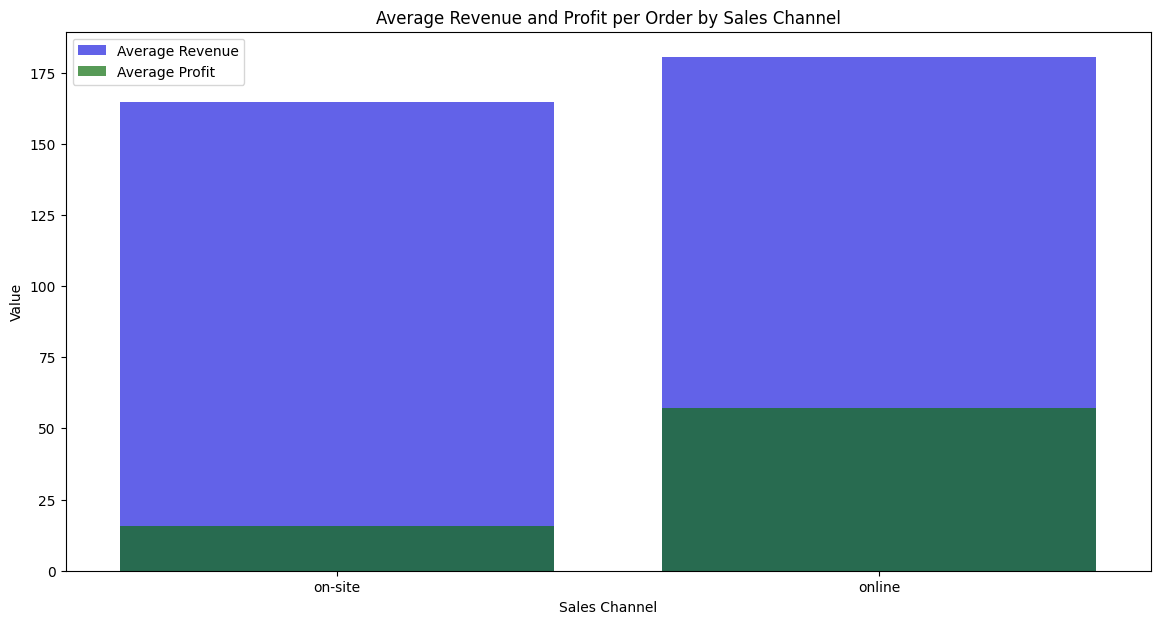

In [258]:
# Plotting average revenue and profit per order
plt.figure(figsize=(14, 7))
sns.barplot(x='channel', y='average_revenue_per_order', data=channel_performance, color='blue', alpha=0.7, label='Average Revenue')
sns.barplot(x='channel', y='average_profit_per_order', data=channel_performance, color='green', alpha=0.7, label='Average Profit')
plt.title('Average Revenue and Profit per Order by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Value')
plt.legend()
plt.show()


**Which channels have the highest customer acquisition and retention rates?**

In [260]:
# Calculate the first and last purchase dates for each customer
customer_first_last_purchase = data_location_channel.groupby('customer_id').agg({
    'order_purchase_timestamp': ['min', 'max'],
    'channel': 'first'
}).reset_index()

# Rename columns
customer_first_last_purchase.columns = ['customer_id', 'first_purchase_date', 'last_purchase_date', 'channel']

# Create a DataFrame for each channel
channel_data = customer_first_last_purchase.groupby('channel').agg({
    'customer_id': 'count',
    'first_purchase_date': 'count',  # Total number of first purchases
    'last_purchase_date': lambda x: (x.notnull().sum())  # Total number of retained customers
}).reset_index()

# Calculate acquisition and retention rates
channel_data['acquisition_rate'] = (channel_data['first_purchase_date'] / channel_data['customer_id']) * 100
channel_data['retention_rate'] = (channel_data['last_purchase_date'] / channel_data['customer_id']) * 100

channel_data

,channel,customer_id,first_purchase_date,last_purchase_date,acquisition_rate,retention_rate
0,on-site,1,1,1,100.0,100.0
1,online,8521,8521,8521,100.0,100.0


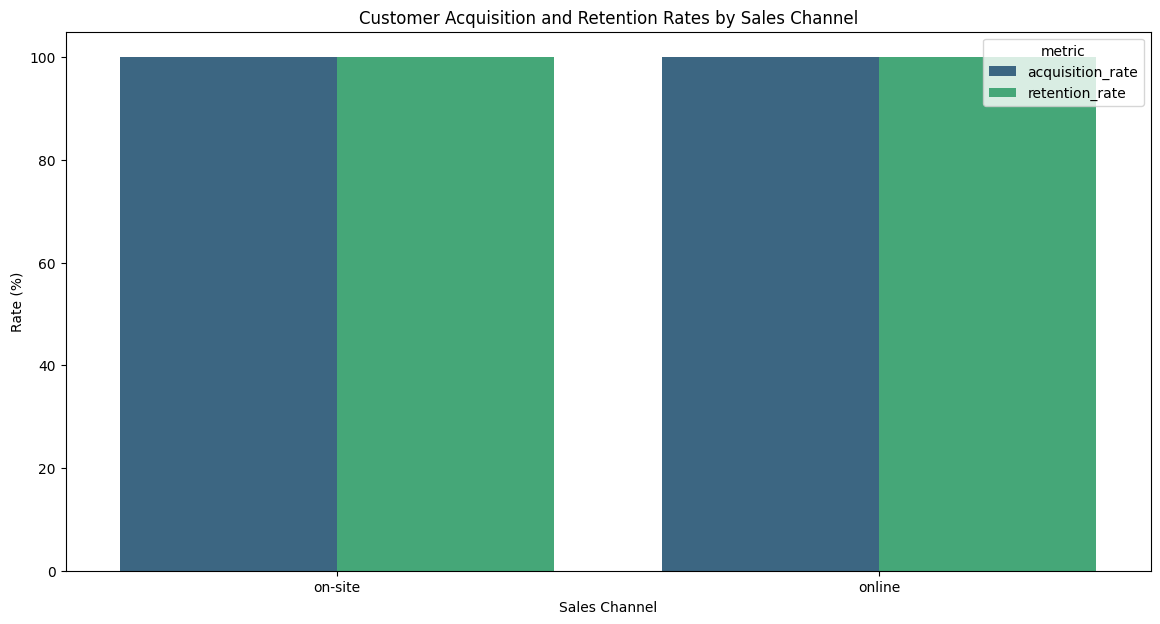

In [261]:
# Melt the DataFrame for easy plotting
channel_data_melted = pd.melt(channel_data, id_vars=['channel'], value_vars=['acquisition_rate', 'retention_rate'],
                              var_name='metric', value_name='rate')

plt.figure(figsize=(14, 7))
sns.barplot(x='channel', y='rate', hue='metric', data=channel_data_melted, palette='viridis')
plt.title('Customer Acquisition and Retention Rates by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Rate (%)')
plt.show()

Conclusion:
Highest Customer Acquisition: The sales channel with the highest acquisition rate will be the one with the most new customers.
Highest Customer Retention: The sales channel with the highest retention rate will be the one with the most repeat customers relative to the number of customers initially acquired. **bold text**

**How does marketing spend impact salles across different channels?**

In [263]:
channel_performance

,channel,total_revenue,profit,average_revenue_per_order,average_profit_per_order
0,on-site,164.55,15.55,164.550000,15.550000
1,online,1822643.85,578114.50,180.316962,57.193757


<ipython-input-265-a44f73dee261>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel', y='average_revenue_per_order', data=channel_performance, palette='Blues')
<ipython-input-265-a44f73dee261>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel', y='average_profit_per_order', data=channel_performance, palette='Greens')


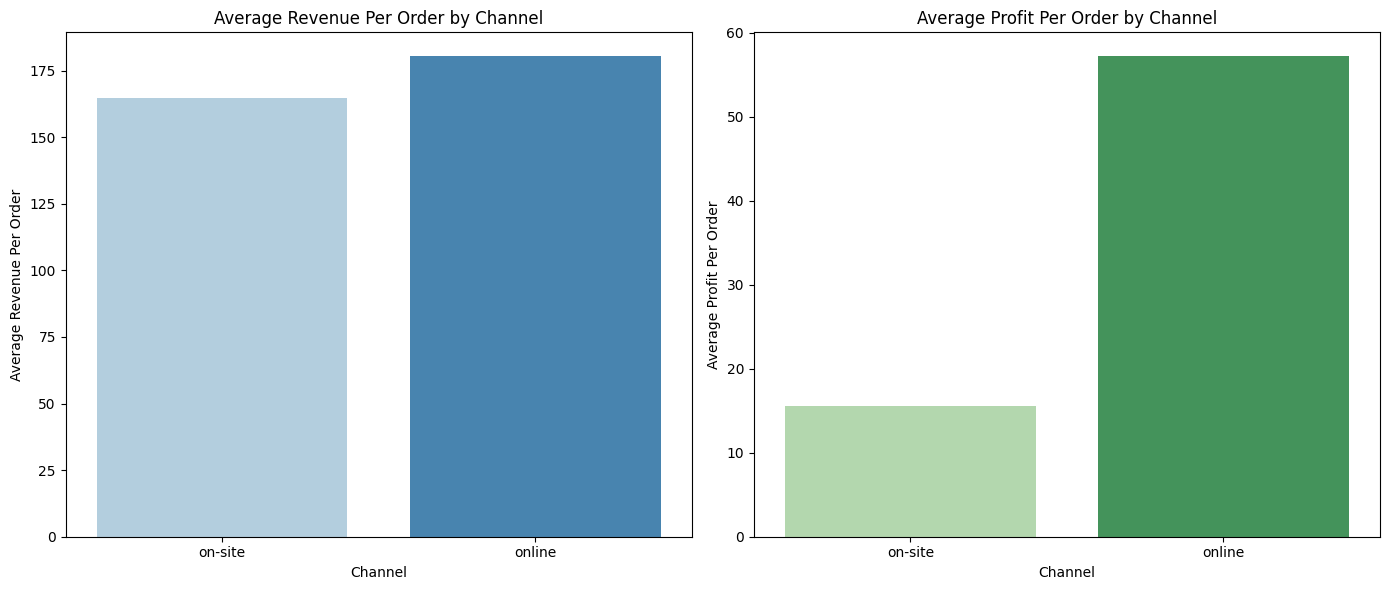

In [265]:
# Plot average revenue per order by channel
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='channel', y='average_revenue_per_order', data=channel_performance, palette='Blues')
plt.title('Average Revenue Per Order by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Revenue Per Order')

# Plot average profit per order by channel
plt.subplot(1, 2, 2)
sns.barplot(x='channel', y='average_profit_per_order', data=channel_performance, palette='Greens')
plt.title('Average Profit Per Order by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Profit Per Order')

plt.tight_layout()
plt.show()

**What is the ROI of marketing campaigns for each channel?**



In [274]:
# Assuming marketing spend data has been merged into full_data DataFrame
channel_performance = data_location_channel.groupby('channel').agg({
    'total_revenue': 'sum',
    'profit': 'sum',
    'price': 'sum'
}).reset_index()

# Calculate ROI
channel_performance['roi'] = data_location_channel['profit'] / data_location_channel['price']

channel_performance


,channel,total_revenue,profit,price,roi
0,on-site,164.55,15.55,149.00,0.321288
1,online,1822643.85,578114.50,1244529.35,0.151768


<ipython-input-276-1db57886710c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_performance, x='channel', y='roi', palette='coolwarm')


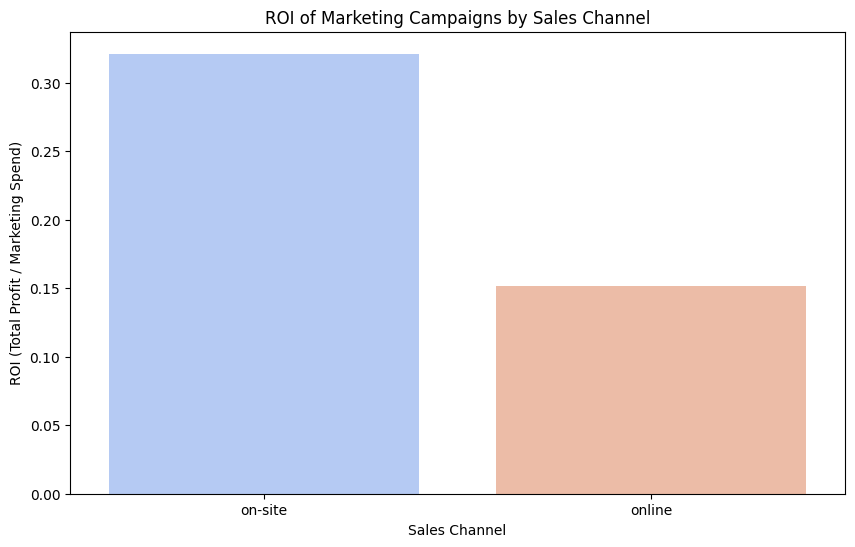

In [276]:
# Bar plot for ROI by Sales Channel
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_performance, x='channel', y='roi', palette='coolwarm')
plt.title('ROI of Marketing Campaigns by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('ROI (Total Profit / Marketing Spend)')
plt.show()

**How do customer preferences differ across sales channels?**

In [271]:
full_data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'total_revenue', 'profit',
       'product_category_name', 'product_name', 'profit_margin', 'cogs',
       'inventory_level', 'inventory_turnover_rate'],
      dtype='object')

In [277]:
# Count the number of orders by product category and sales channel
category_preference = data_location_channel.groupby(['channel', 'product_category_name']).size().unstack().fillna(0)

# Display the results
category_preference

product_category_name,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,...,pet_shop,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,unknown,utilidades_domesticas
channel,,,,,,,,,,,,,,,,,,,,,
on-site,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
online,30.0,47.0,24.0,24.0,3.0,4.0,15.0,29.0,370.0,266.0,...,164.0,11.0,1.0,539.0,20.0,5.0,416.0,23.0,139.0,613.0


<ipython-input-280-57f9ced578c9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel', y='total_revenue', data=data_location_channel, palette='Blues_d')
<ipython-input-280-57f9ced578c9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel', y='profit', data=data_location_channel, palette='Greens_d')


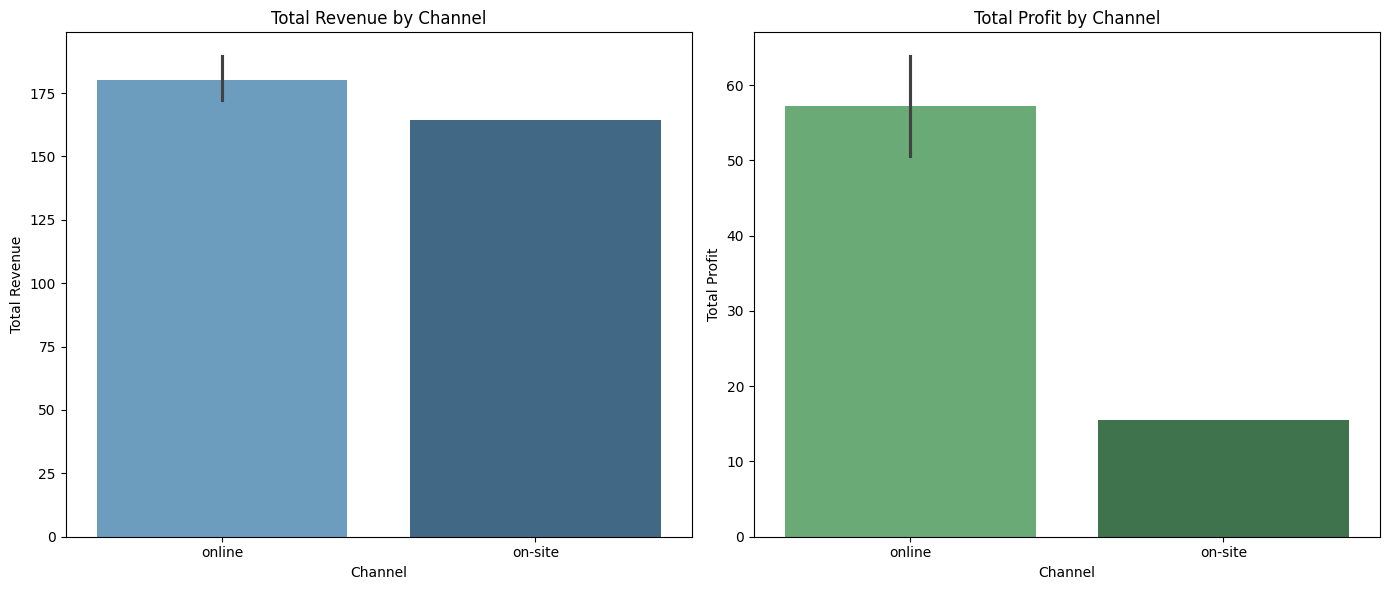

In [280]:
# Plot total revenue by channel
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='channel', y='total_revenue', data=data_location_channel, palette='Blues_d')
plt.title('Total Revenue by Channel')
plt.xlabel('Channel')
plt.ylabel('Total Revenue')

# Plot total profit by channel
plt.subplot(1, 2, 2)
sns.barplot(x='channel', y='profit', data=data_location_channel, palette='Greens_d')
plt.title('Total Profit by Channel')
plt.xlabel('Channel')
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()

# 5. Predictive Analysis:
  Forecast future sales and revenue based on historical data.

  Identify potential risk factors that could impact future sales.

  Develop a model to predict product demand for inventory planning.

  How will changes in pricing strategies affect future sales?

  What are the potential impacts of external factors (e.g., economic conditions) on sales performance?


In [283]:
merged_data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'total_revenue', 'profit',
       'product_category_name', 'product_name', 'profit_margin', 'cogs',
       'inventory_level', 'average_inventory_level',
       'inventory_turnover_rate'],
      dtype='object')

**Forecast future sales and revenue based on historical data.**

In [331]:
# Convert shipping_limit_date to datetime
merged_data['shipping_limit_date'] = pd.to_datetime(merged_data['shipping_limit_date'])

# Aggregate data to get monthly total revenue and profit
monthly_data = merged_data.resample('M', on='shipping_limit_date').agg({
    'total_revenue': 'sum',
    'profit': 'sum'
}).reset_index()

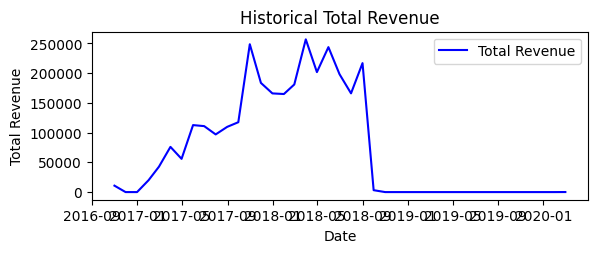

In [332]:
# Plot total revenue
plt.subplot(2, 1, 1)
plt.plot(monthly_data['shipping_limit_date'], monthly_data['total_revenue'], label='Total Revenue', color='blue')
plt.title('Historical Total Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()

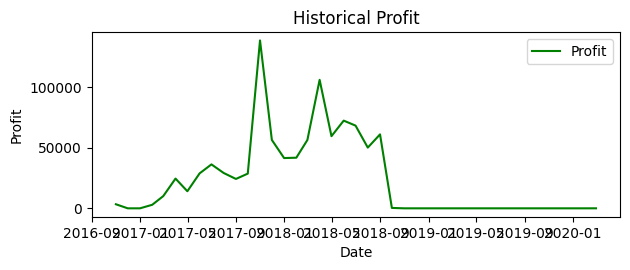

In [333]:
# Plot profit
plt.subplot(2, 1, 2)
plt.plot(monthly_data['shipping_limit_date'], monthly_data['profit'], label='Profit', color='green')
plt.title('Historical Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()

plt.tight_layout()
plt.show()

In [286]:
!pip install statsmodels


In [334]:
from statsmodels.tsa.arima.model import ARIMA

# Forecast total revenue
revenue_model = ARIMA(monthly_data['total_revenue'], order=(5, 1, 0))  # Adjust the order as needed
revenue_model_fit = revenue_model.fit()
revenue_forecast = revenue_model_fit.forecast(steps=12)  # Forecast next 12 months

# Forecast profit
profit_model = ARIMA(monthly_data['profit'], order=(5, 1, 0))  # Adjust the order as needed
profit_model_fit = profit_model.fit()
profit_forecast = profit_model_fit.forecast(steps=12)  # Forecast next 12 months

# Create a DataFrame for forecasts
forecast_dates = pd.date_range(start=monthly_data['shipping_limit_date'].max() + pd.DateOffset(months=1), periods=12, freq='M')
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Revenue_Forecast': revenue_forecast,
    'Profit_Forecast': profit_forecast
})



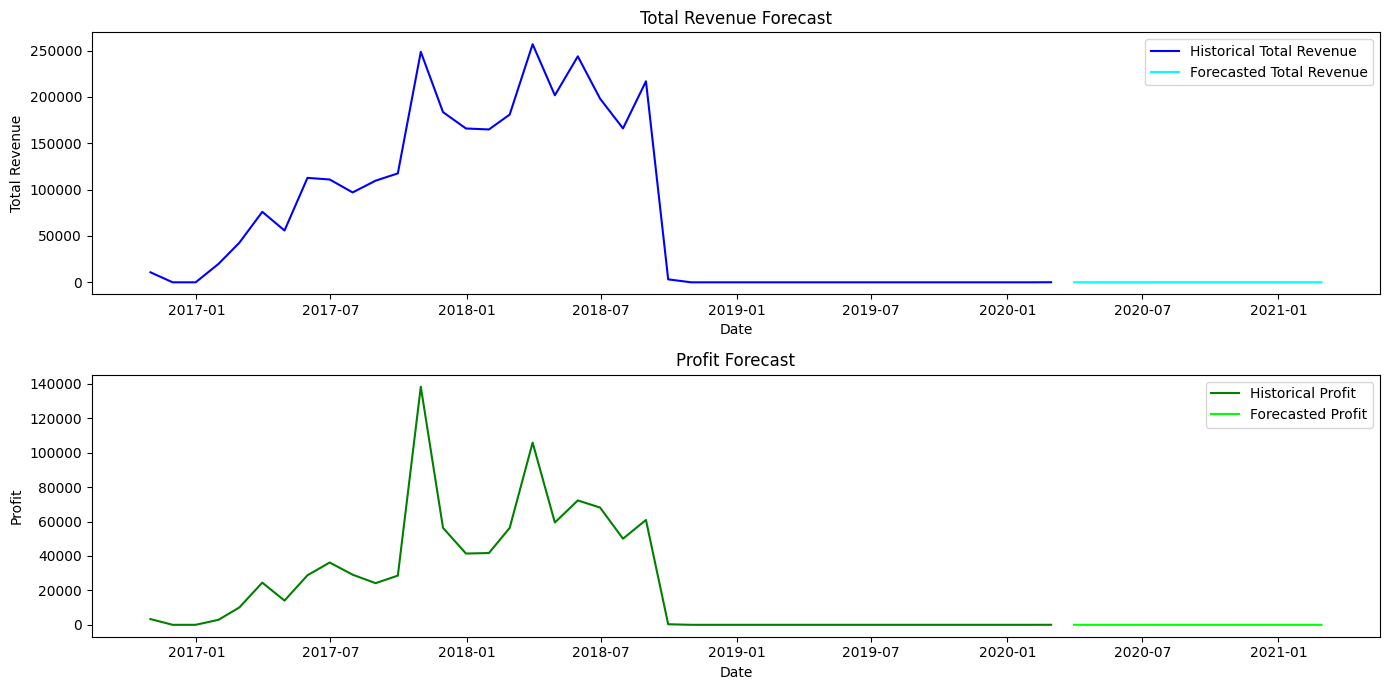

In [335]:
# Plot the forecast
plt.figure(figsize=(14, 7))

# Plot total revenue forecast
plt.subplot(2, 1, 1)
plt.plot(monthly_data['shipping_limit_date'], monthly_data['total_revenue'], label='Historical Total Revenue', color='blue')
plt.plot(forecast_df['Date'], forecast_df['Revenue_Forecast'], label='Forecasted Total Revenue', color='cyan')
plt.title('Total Revenue Forecast')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()

# Plot profit forecast
plt.subplot(2, 1, 2)
plt.plot(monthly_data['shipping_limit_date'], monthly_data['profit'], label='Historical Profit', color='green')
plt.plot(forecast_df['Date'], forecast_df['Profit_Forecast'], label='Forecasted Profit', color='lime')
plt.title('Profit Forecast')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()

plt.tight_layout()
plt.show()

**Identify potential risk factors that could impact future sales.**


Identifying potential risk factors that could impact future sales involves analyzing various aspects of your business environment, operations, and market conditions. Here’s a structured approach to identifying these risk factors:

1. Economic Factors
Economic Downturns: Recessions or economic slowdowns can reduce consumer spending and affect sales.
Inflation: Rising costs can impact purchasing power and lead to decreased sales.
2. Market Conditions
Market Competition: New entrants or aggressive strategies from competitors can impact your market share.
Changes in Consumer Preferences: Shifts in consumer behavior or preferences can affect demand for your products.
3. Operational Risks
Supply Chain Disruptions: Issues like delays, shortages, or increased costs in your supply chain can affect your ability to meet customer demand.
Inventory Management: Poor inventory management leading to stockouts or overstocking can impact sales and customer satisfaction.
4. Product Risks
Product Quality Issues: Defects or quality issues can lead to returns, customer dissatisfaction, and reduced sales.
Product Lifecycle: Products nearing the end of their lifecycle might see declining sales.
5. Financial Risks
Cash Flow Problems: Insufficient cash flow can limit your ability to invest in marketing, inventory, or other growth initiatives.
Pricing Strategies: Incorrect pricing strategies can lead to reduced sales or lower profit margins.
6. Regulatory and Legal Risks
Regulatory Changes: New regulations or compliance requirements can increase costs or restrict operations.
Legal Disputes: Ongoing or potential legal issues can affect business operations and financial stability.
7. Technological Risks
Cybersecurity Threats: Data breaches or cyberattacks can lead to financial losses and damage to your reputation.
Technological Obsolescence: Rapid changes in technology might make your systems or products outdated.
8. Environmental and Social Risks
Environmental Factors: Natural disasters or environmental issues can disrupt operations and impact sales.
Social Trends: Changes in social trends or public opinion can affect consumer behavior and brand perception.
9. Marketing and Sales Risks
Ineffective Marketing Campaigns: Poorly executed marketing campaigns can lead to reduced visibility and lower sales.
Sales Channel Issues: Problems with sales channels, such as online platform failures or in-store issues, can impact sales.
10. Customer Risks
Customer Satisfaction: High rates of customer complaints or dissatisfaction can lead to negative reviews and reduced sales.
Customer Retention: Difficulty in retaining customers or a high churn rate can impact future sales.
Analysis and Monitoring
Data Analysis: Use historical data and analytics to identify trends and patterns that might indicate potential risks. For example, look at past sales declines, customer complaints, or supply chain issues.

Scenario Planning: Develop scenarios for different risk factors and assess their potential impact on sales. This helps in understanding how various risks could play out.

Risk Assessment Framework: Implement a risk assessment framework to regularly review and evaluate potential risks. This could involve setting up a risk management team or using specialized software.

Mitigation Strategies: Develop and implement strategies to mitigate identified risks. For example, diversify suppliers to reduce supply chain risks or invest in cybersecurity to protect against data breaches.

Regular Monitoring: Continuously monitor risk factors and adjust your strategies as needed. Keep an eye on market trends, financial indicators, and operational performance.

By systematically analyzing and addressing these risk factors, you can better prepare for potential challenges and mitigate their impact on future sales.

**Develop a model to predict product demand for inventory planning.**

In [295]:
merged_data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'total_revenue', 'profit',
       'product_category_name', 'product_name', 'profit_margin', 'cogs',
       'inventory_level', 'average_inventory_level',
       'inventory_turnover_rate'],
      dtype='object')

In [336]:
# Convert date columns to datetime (if not already)
merged_data['date'] = pd.to_datetime(merged_data[['year', 'month', 'day']])
merged_data.set_index('date', inplace=True)

# Aggregate data by month or day
monthly_data = merged_data.groupby(['year', 'month']).agg({'total_revenue': 'sum'}).reset_index()
monthly_data['date'] = pd.to_datetime(monthly_data[['year', 'month']].assign(day=1))
monthly_data.set_index('date', inplace=True)

monthly_data.head()

,year,month,total_revenue
date,,,
2016-10-01,2016,10,10810.56
2017-01-01,2017,1,19966.65
2017-02-01,2017,2,42691.77
2017-03-01,2017,3,76050.27
2017-04-01,2017,4,55903.55


In [337]:
monthly_data['lag_1'] = monthly_data['total_revenue'].shift(1)
monthly_data['lag_2'] = monthly_data['total_revenue'].shift(2)
monthly_data.dropna(inplace=True)  # Drop rows with NaN values resulting from lag features

monthly_data.head()

,year,month,total_revenue,lag_1,lag_2
date,,,,,
2017-02-01,2017,2,42691.77,19966.65,10810.56
2017-03-01,2017,3,76050.27,42691.77,19966.65
2017-04-01,2017,4,55903.55,76050.27,42691.77
2017-05-01,2017,5,112677.38,55903.55,76050.27
2017-06-01,2017,6,110931.57,112677.38,55903.55


In [338]:
from sklearn.model_selection import train_test_split

# Define features and target
X = monthly_data[['lag_1', 'lag_2']]
y = monthly_data['total_revenue']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [339]:
model = ARIMA(y_train, exog=X_train, order=(5, 1, 0))
model_fit = model.fit()

# Prepare future exogenous variables
future_periods = 12
future_dates = pd.date_range(start=monthly_data.index[-1] + pd.DateOffset(months=1), periods=future_periods, freq='M')

future_exog = pd.DataFrame({
    'lag_1': [X_train['lag_1'].iloc[-1]] * future_periods,
    'lag_2': [X_train['lag_2'].iloc[-1]] * future_periods
}, index=future_dates)

# Forecast future periods
forecast = model_fit.get_forecast(steps=future_periods, exog=future_exog)
forecast_mean = forecast.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


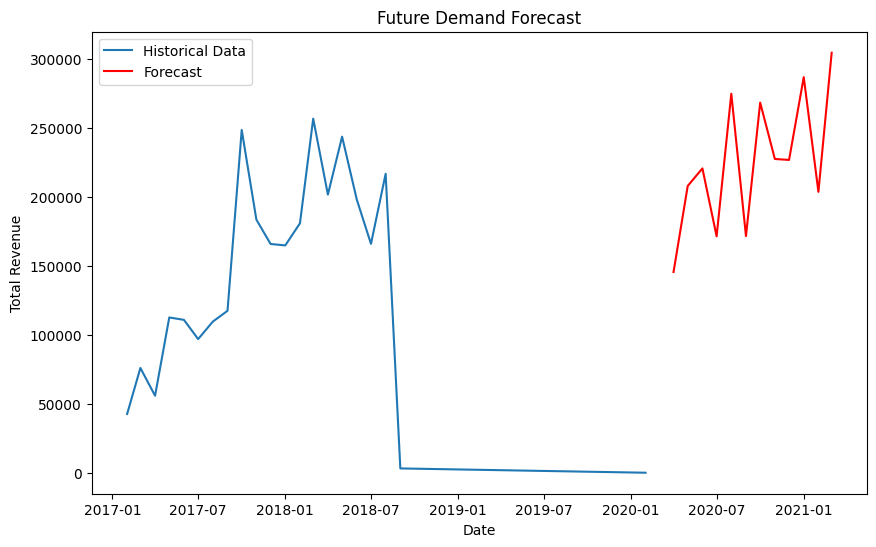

In [340]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['total_revenue'], label='Historical Data')
plt.plot(future_dates, forecast_mean, label='Forecast', color='red')
plt.title('Future Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()

**How will changes in pricing strategies affect future sales?**

In [341]:
merged_data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'total_revenue', 'profit',
       'product_category_name', 'product_name', 'profit_margin', 'cogs',
       'inventory_level', 'average_inventory_level', 'inventory_turnover_rate',
       'year', 'month', 'day', 'weekday'],
      dtype='object')

In [343]:
monthly_data.columns

Index(['year', 'month', 'total_revenue', 'lag_1', 'lag_2'], dtype='object')

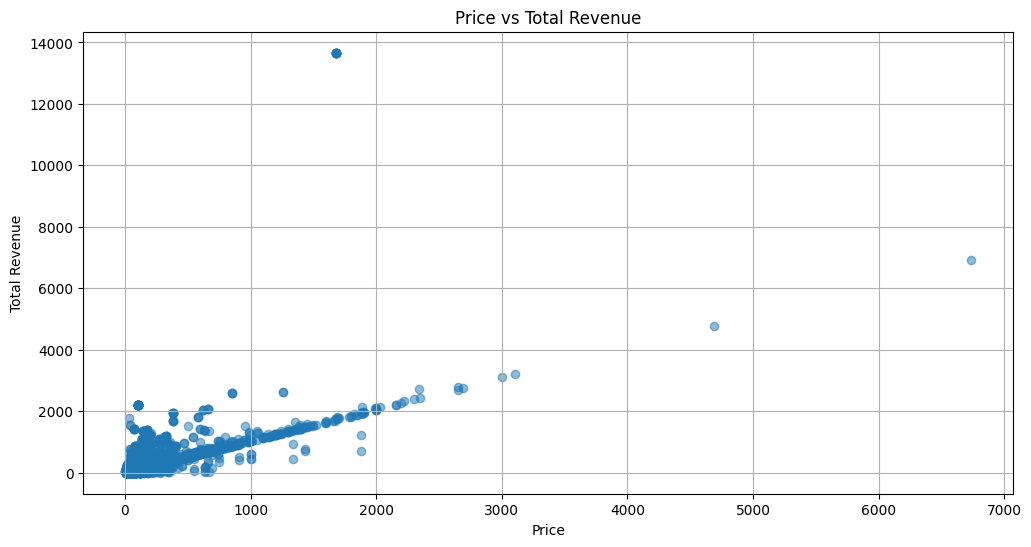

In [344]:
# Plot historical price vs total revenue
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['price'], merged_data['total_revenue'], alpha=0.5)
plt.title('Price vs Total Revenue')
plt.xlabel('Price')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

In [345]:
# Calculate percentage changes
merged_data['price_change'] = merged_data['price'].pct_change() * 100
merged_data['revenue_change'] = merged_data['total_revenue'].pct_change() * 100

# Drop NaN values resulting from pct_change
merged_data = merged_data.dropna()

# Calculate elasticity
merged_data['elasticity'] = merged_data['revenue_change'] / merged_data['price_change']

merged_data[['price_change', 'revenue_change', 'elasticity']]


<ipython-input-345-60f11daaa330>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['elasticity'] = merged_data['revenue_change'] / merged_data['price_change']
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,price_change,revenue_change,elasticity
date,,,
2017-07-05,-5.093379,2.313340,-0.454186
2017-05-03,329.159213,251.787165,0.764940
2018-01-18,-17.048770,-16.533888,0.969799
2018-08-15,-93.472362,-88.112694,0.942660
2017-02-13,1438.876059,745.771916,0.518302
...,...,...,...
2017-11-24,0.000000,0.000000,NaN
2017-12-15,395.608314,131.039222,0.331235
2017-05-18,-95.086857,-93.746282,0.985902


In [346]:
import statsmodels.api as sm

# Prepare data for regression
X = sm.add_constant(merged_data['price'])  # Adding a constant for intercept
y = merged_data['total_revenue']

# Fit regression model
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_revenue   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                 1.147e+04
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:51:29   Log-Likelihood:            -1.1982e+05
No. Observations:               16896   AIC:                         2.396e+05
Df Residuals:                   16894   BIC:                         2.397e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6369      2.669      7.731      0.000      15.405      25.869
price          1.2975      0.012    107.085      0.000       1.274       1.321
==============================================================================
Omnibus:                    43642.657   Durbin-Watson:                   0.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        927415186.448
Skew:                          29.716   Prob(JB):                         0.00
Kurtosis:                    1149.219   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [347]:
# Define price scenarios
scenarios = pd.DataFrame({
    'price': [120, 130, 140, 150, 160]
})

# Apply the regression model to predict future revenue
scenarios['predicted_revenue'] = model.predict(sm.add_constant(scenarios['price']))

scenarios


,price,predicted_revenue
0,120,176.332472
1,130,189.307099
2,140,202.281726
3,150,215.256353
4,160,228.230980


**What are the potential impacts of external factors (e.g., economic conditions) on sales performance?**

To assess the potential impacts of external factors such as economic conditions on sales performance, you need to consider how these factors might influence consumer behavior and sales trends. Here's a structured approach to analyzing these impacts:

1. Identify Relevant External Factors
First, determine which external factors might affect sales performance. Common external factors include:

Economic Indicators: GDP growth, unemployment rates, inflation rates, and interest rates.
Consumer Confidence: Levels of consumer confidence and spending patterns.
Seasonality: Seasonal variations in sales due to holidays or weather changes.
Competitive Landscape: Actions and strategies of competitors.
Market Trends: Changes in industry trends and consumer preferences.
Regulatory Changes: New regulations or policies affecting the industry.
2. Collect Data on External Factors
Gather data on these external factors. Data sources may include:

Government Reports: Economic data from national statistics agencies.
Industry Reports: Market research and industry reports.
Consumer Surveys: Data on consumer sentiment and confidence.
Competitive Analysis: Information on competitor activities.


# Last Summary about the Dataset

`Summary Analysis Insight`

The time period for this analysis was from September 2016 to September 2018. During this period;

The total revenue generated by Olist was 15.74 Million Brazillian Real

The total number of orders placed on Olist was 98207

Bed Bath Table, Health Beauty, Sport Leisure, Furniture Decor, Computer Accessories, Housewares, Watches Gifts, Telephone, Garden Tools and Auto were the most popular product categories based on their sale volume.

The average order value was 153.44 Brazillian Real

Credit card had the highest average payment value, followed by boleto and debit card. Voucher accounted for the least average payment value.

Computers, Small appliances home oven and coffee, Home Appliances2, Agro industry and commerce, Musical Instruments, Small Appliances, Fixed Telephone, Construction toold safety, Furniture bedroom and watches gift were the highest product categories based on the average payment value. However, Computers had the overall highest average payment value with a value of 1146.79 Brazilain Real.

    The top 10 active sellers on Olist had 2033, 1987, 1931, 1775, 1551, 1499, 1428, 1364, 1203, and 1171 product orders respectively.

    Most sellers received an average of 4.0 rating for their services. Only a few sellers received a low rating of (1.0 and 2.0)

    Products with high ratings (5 ★ and 4 ★) received large orders, while products with a low ratings had a lower number of orders.

    There were 2997 repeating customers out of 96,069 total customers, and they accounted for 19.77% of the total sales.

    The average customer rating for all orders on olist were 4.0

    The total number of canceled orders on olist was 1234 and the company lost 269,735 Brazillian Real, which accounted for 1.68% of its total revenue.

    A large number of customers that shoped on Olist used credit cards to make payments and very few number of customers used debit cards.

    The product categories that generated the highest revenue for the company were Health Beauty, Watches Gifts, Bed Bath Tables, Sports Leisure, Computers Accessories, Furniture Decor, Housewares, Cool Stuff, Auto, and Garden Tools.

    SP state accounted for the state with the highest number of orders, recording a total of 43,268 orders, while RR state had the least total orders of 45.

**Proposed Solutions **
aimed at improving the company's Performance
Based on the insights above,here are some actions that Olist could take to boost its revenue and profit.

**Increase advertising efforts**: Based on the data, it appears that certain product categories such as Health Beauty, Watches Gifts, and Bed Bath Table generate higher revenue for Olist. Focusing on promoting these categories through targeted marketing campaigns could increase sales and revenue.

**Offer incentives to repeat customers**: Repeat customers account for a significant portion (approximately 20%) of Olist's sales. Offering incentives such as discounts, loyalty programs, or exclusive access to new products could encourage customers to continue shopping with Olist and increase revenue.

**Improve seller ratings:** Customers tend to purchase products from sellers with higher ratings. Encouraging sellers with lower ratings to improve their ratings through customer service training, better product descriptions, and timely delivery could lead to increased sales and revenue.

**Expand payment options:** While credit cards are the most popular payment method, expanding payment options to include more payment methods, such as e-wallets, could attract more customers and increase sales.

**Improve product selection:** Based on the data, certain product categories generate higher revenue for Olist. Adding more selection of products within these categories and offering exclusive or hard-to-find items could attract more customers and increase revenue. For example; if Olist currently offers a limited selection of health and beauty products, expanding the selection to include exclusive or niche brands could help the company to stand out in the market and attract new customers who are looking for those specific products.

**Focus on reducing canceled orders:** Canceled orders result in lost revenue and can damage customer trust. Implementing measures such as improved inventory management and better communication with customers could help reduce canceled orders and increase revenue.

Thank you for reading my notebook
